#      COVID-19 Data Analysis Project

This is my first data analysis project using NumPy, Pandas, and Matplotlib.
I have analyzed a COVID-19 dataset sourced from Kaggle, exploring trends and insights related to confirmed cases, recoveries, and deaths across different countries and dates.

In [45]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [46]:
#reading the data from csv file and renaming the required data
df = pd.read_csv(r'C:\Users\Harsh\Downloads\time-series-19-covid-combined.csv.zip')
df.drop(["Province/State"],axis=1,inplace=True)
df.rename(columns={"Country/Region":"Country"},inplace=True)

In [50]:
df.head(10)

Date      Country       Lat       Long  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan  33.93911  67.709953          0        0.0       0
1  2020-01-23  Afghanistan  33.93911  67.709953          0        0.0       0
2  2020-01-24  Afghanistan  33.93911  67.709953          0        0.0       0
3  2020-01-25  Afghanistan  33.93911  67.709953          0        0.0       0
4  2020-01-26  Afghanistan  33.93911  67.709953          0        0.0       0
5  2020-01-27  Afghanistan  33.93911  67.709953          0        0.0       0
6  2020-01-28  Afghanistan  33.93911  67.709953          0        0.0       0
7  2020-01-29  Afghanistan  33.93911  67.709953          0        0.0       0
8  2020-01-30  Afghanistan  33.93911  67.709953          0        0.0       0
9  2020-01-31  Afghanistan  33.93911  67.709953          0        0.0       0

In [8]:
#changing all the empty stuff to constant
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [11]:
#grouping the data by country and date
df3 = df2.groupby(["Country", "Date"])[["Confirmed", "Recovered", "Deaths"]].sum().reset_index()

In [12]:
df3.head(20)

Country        Date Confirmed Recovered Deaths
0   Afghanistan  2020-01-22         0       0.0      0
1   Afghanistan  2020-01-23         0       0.0      0
2   Afghanistan  2020-01-24         0       0.0      0
3   Afghanistan  2020-01-25         0       0.0      0
4   Afghanistan  2020-01-26         0       0.0      0
5   Afghanistan  2020-01-27         0       0.0      0
6   Afghanistan  2020-01-28         0       0.0      0
7   Afghanistan  2020-01-29         0       0.0      0
8   Afghanistan  2020-01-30         0       0.0      0
9   Afghanistan  2020-01-31         0       0.0      0
10  Afghanistan  2020-02-01         0       0.0      0
11  Afghanistan  2020-02-02         0       0.0      0
12  Afghanistan  2020-02-03         0       0.0      0
13  Afghanistan  2020-02-04         0       0.0      0
14  Afghanistan  2020-02-05         0       0.0      0
15  Afghanistan  2020-02-06         0       0.0      0
16  Afghanistan  2020-02-07         0       0.0      0
17  Afghanistan  2020-02-08         0       0.0      0
18  Afghanistan  2020-02-09         0       0.0      0
19  Afghanistan  2020-02-10         0       0.0      0

In [13]:
countries=df3["Country"].unique()

In [16]:
X=len(countries)
X

189

In [24]:
df3["Confirmed"] = pd.to_numeric(df3["Confirmed"], errors="coerce")
df3["Recovered"] = pd.to_numeric(df3["Recovered"], errors="coerce")
df3["Deaths"] = pd.to_numeric(df3["Deaths"], errors="coerce")

In [26]:
df4 = df3.groupby("Date")[["Confirmed", "Recovered", "Deaths"]].sum().reset_index()

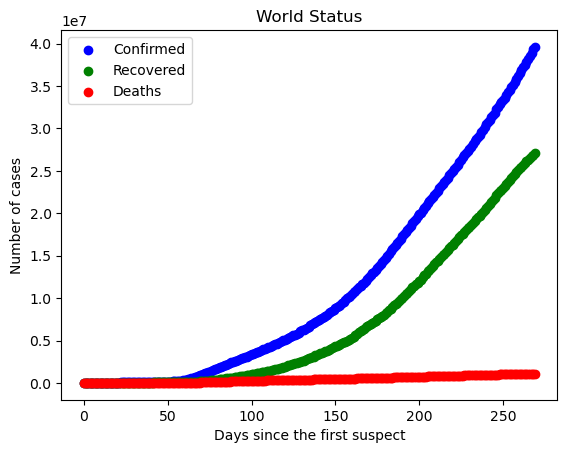

In [27]:
df4
plt.scatter(np.arange(0,len(df4)),df4['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(df4)),df4['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(df4)),df4['Deaths'],color='red',label='Deaths')
plt.title('World Status')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [34]:
#adding new column of active cases
df3["Active"] = df3["Confirmed"] - df3["Recovered"] - df3["Deaths"]

In [36]:
df5 = df3.groupby("Date")[["Active","Confirmed", "Recovered", "Deaths"]].sum().reset_index()

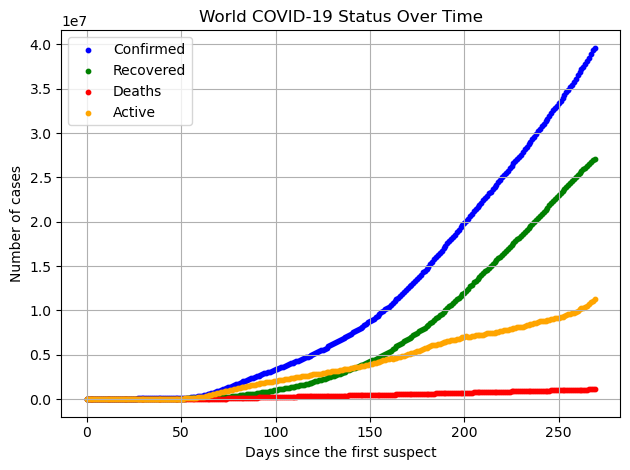

In [39]:

plt.scatter(np.arange(0, len(df5)), df5['Confirmed'], color='blue', label='Confirmed', s=10)
plt.scatter(np.arange(0, len(df5)), df5['Recovered'], color='green', label='Recovered', s=10)
plt.scatter(np.arange(0, len(df5)), df5['Deaths'], color='red', label='Deaths', s=10)
plt.scatter(np.arange(0, len(df5)), df5["Active"], color='orange', label='Active', s=10)

plt.title('World COVID-19 Status Over Time')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


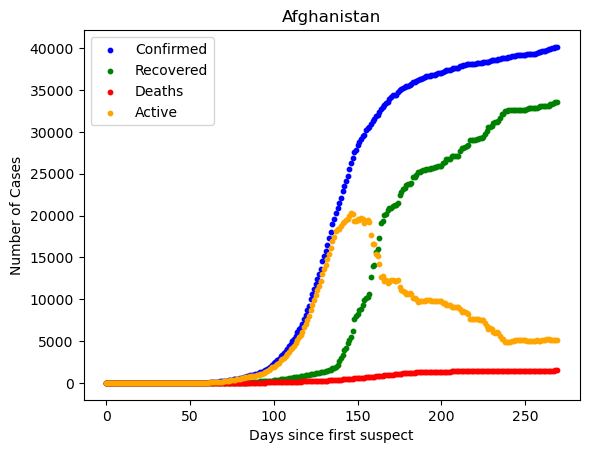

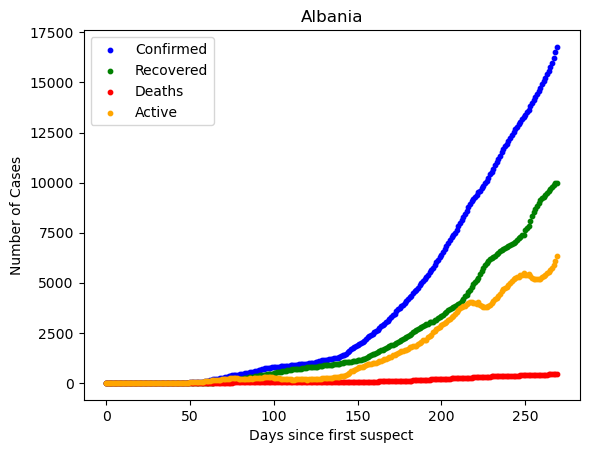

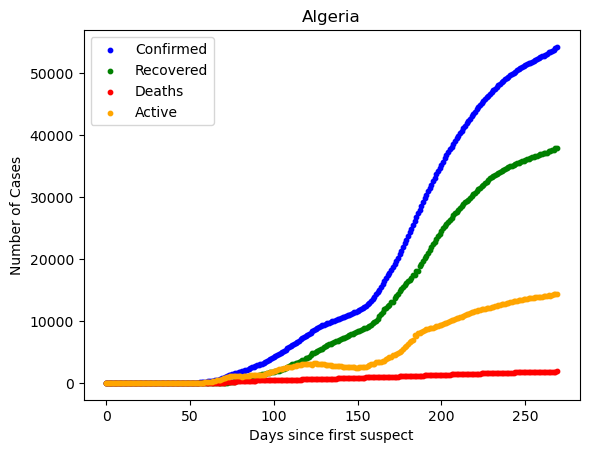

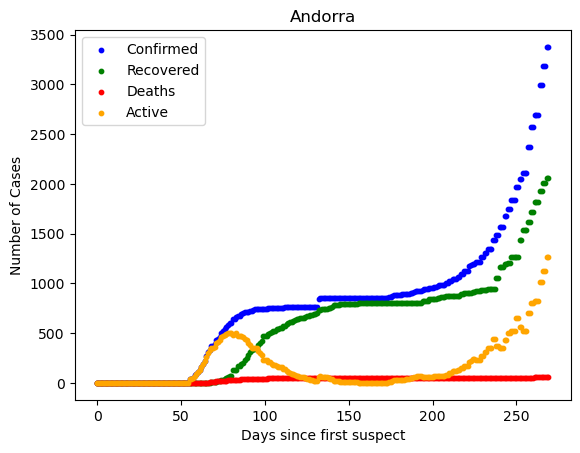

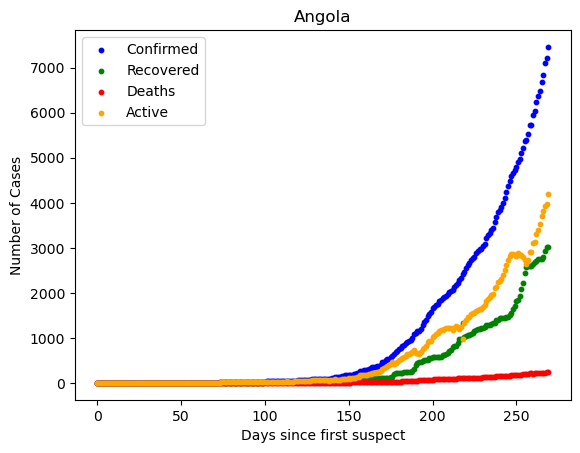

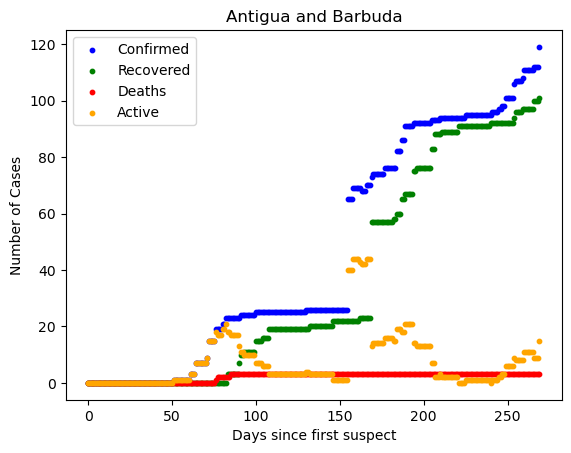

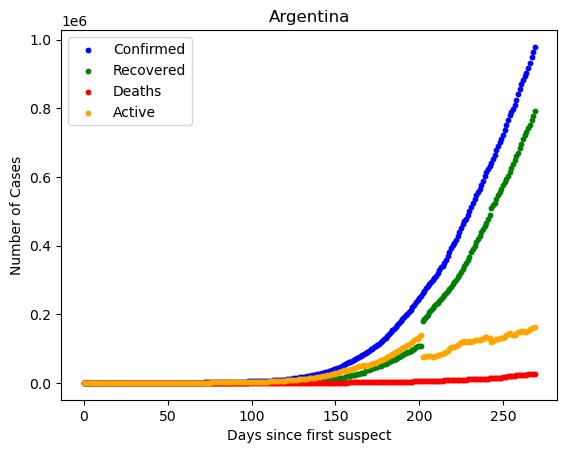

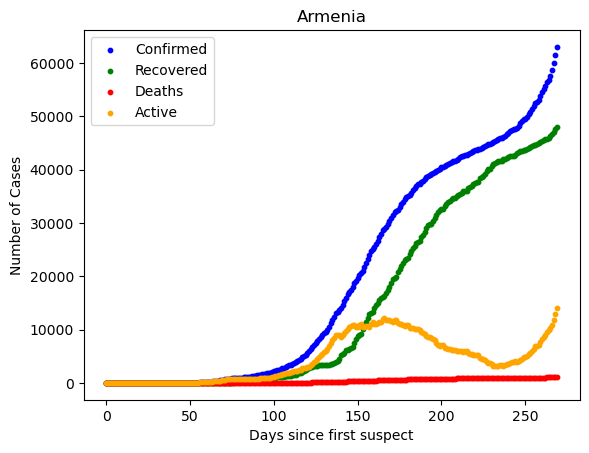

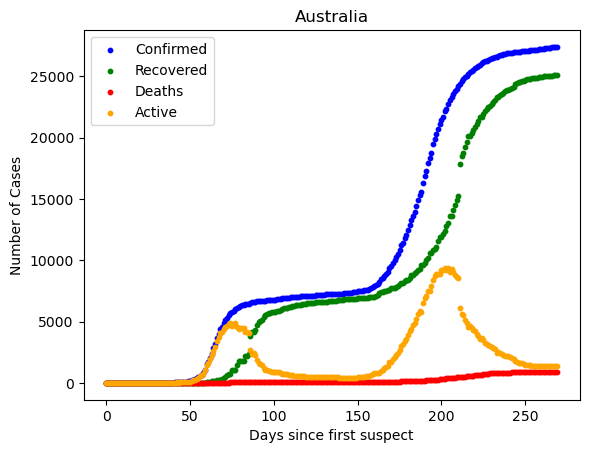

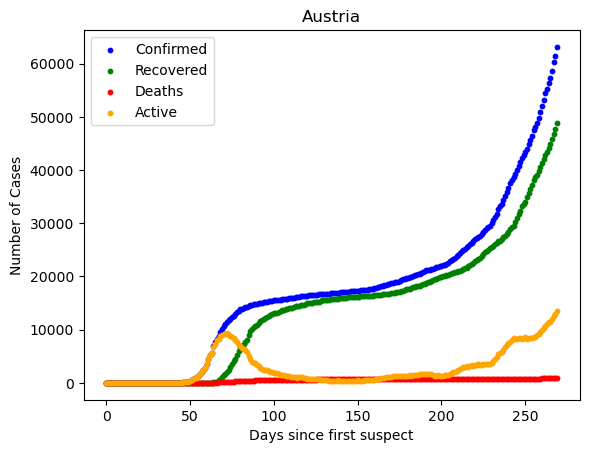

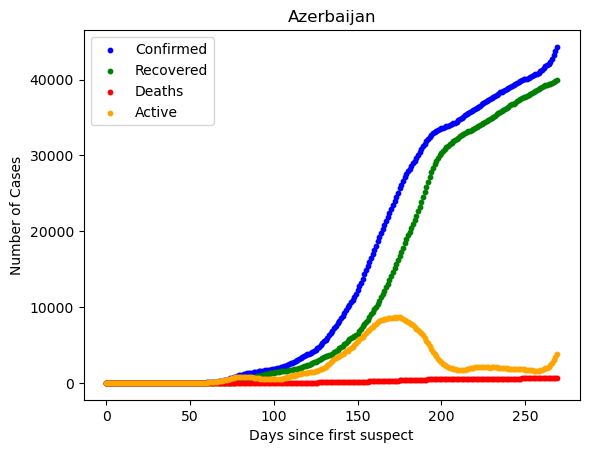

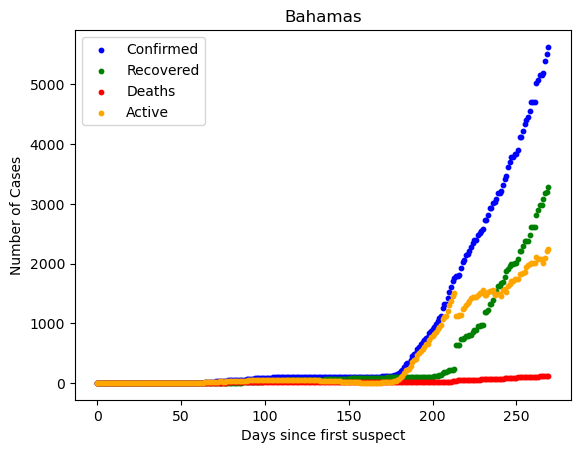

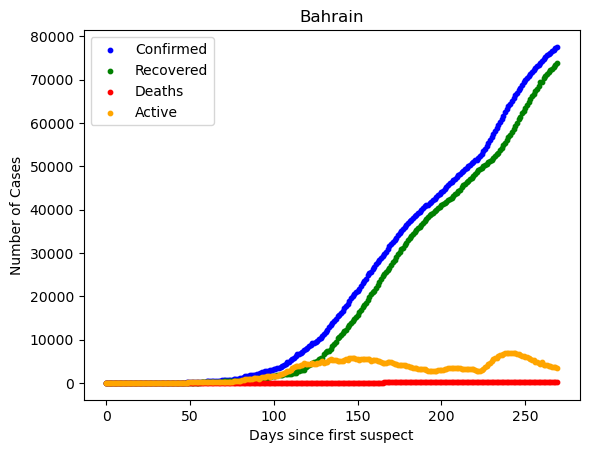

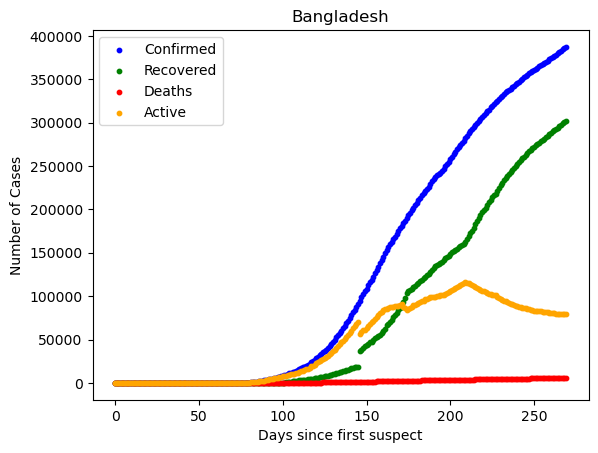

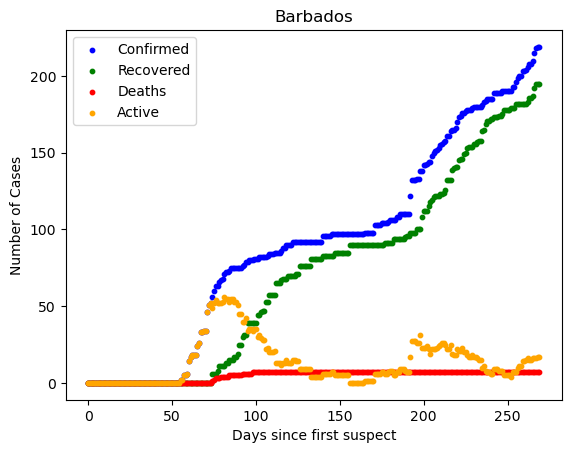

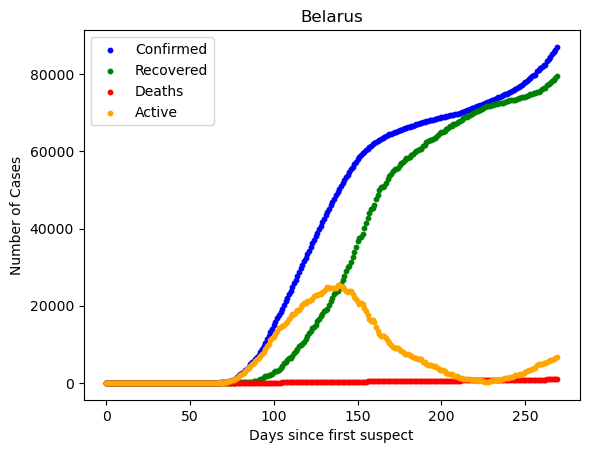

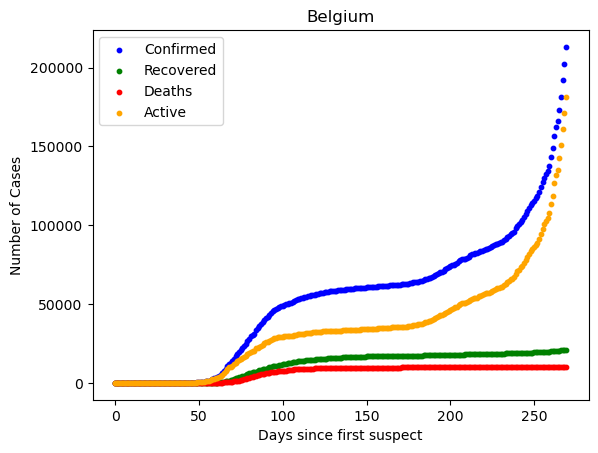

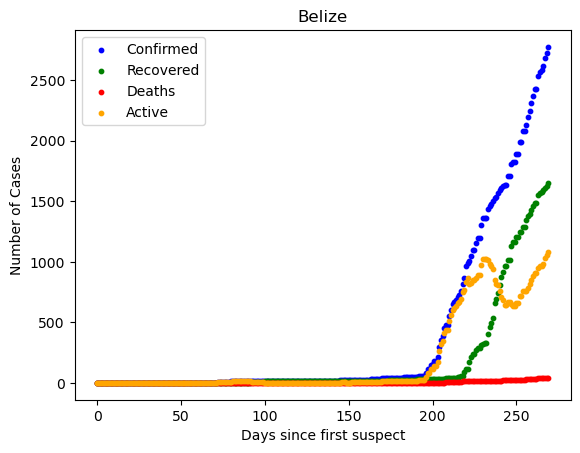

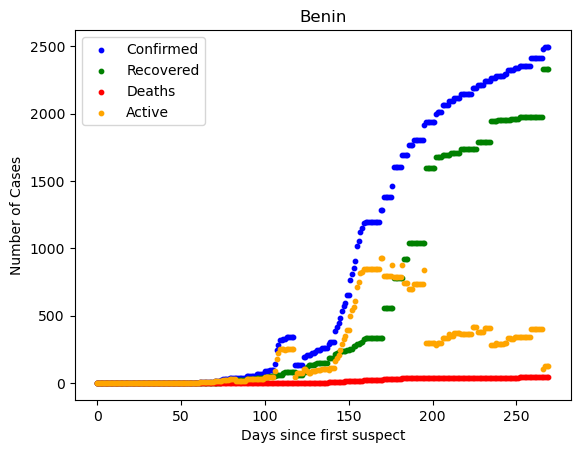

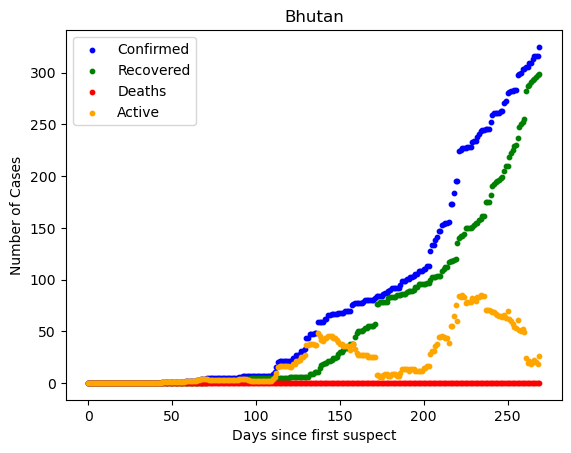

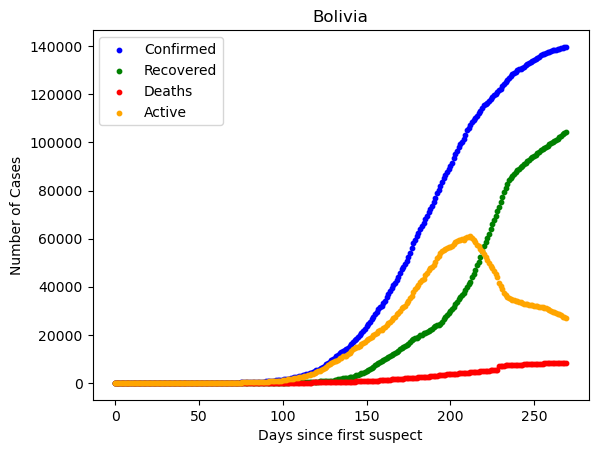

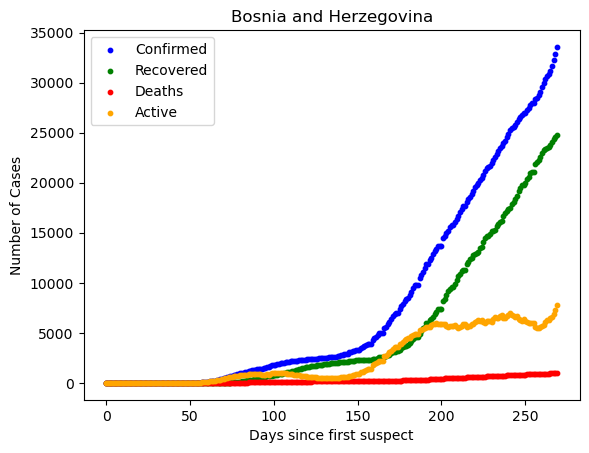

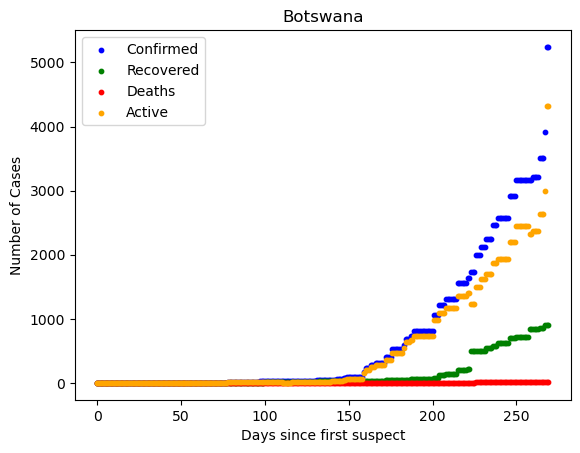

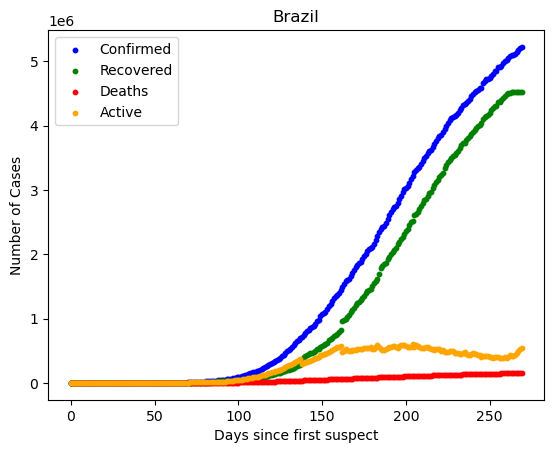

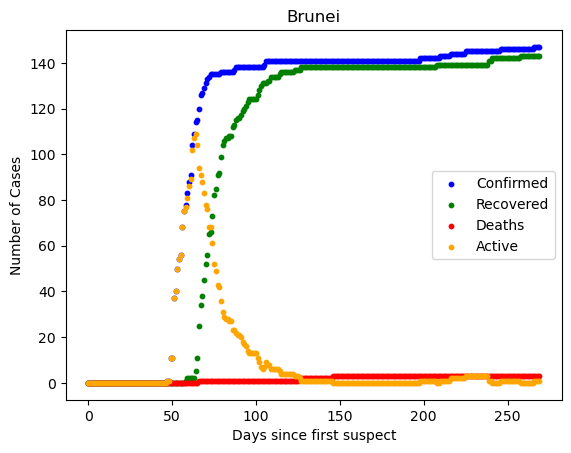

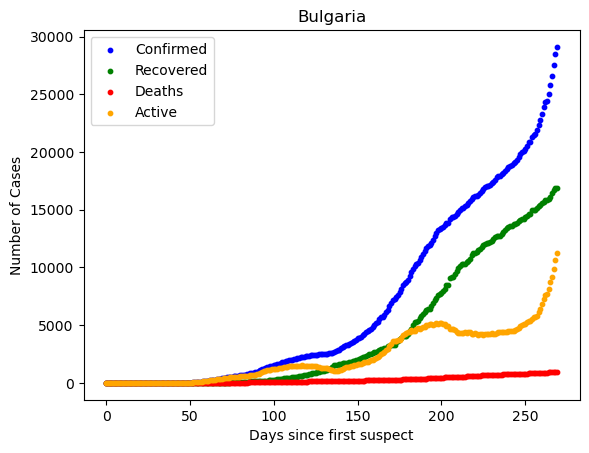

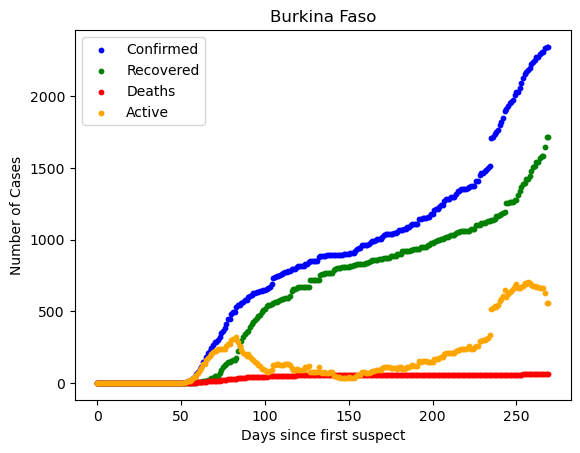

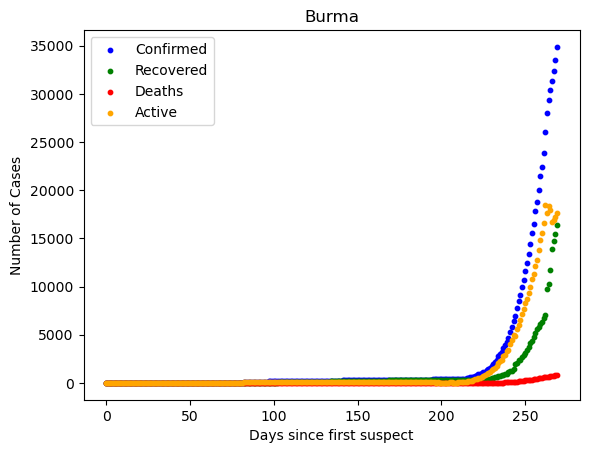

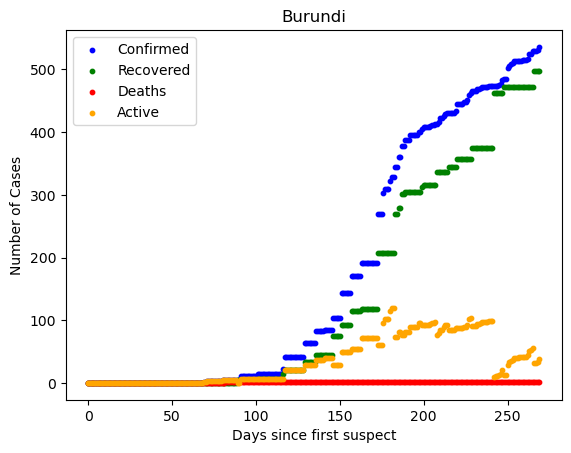

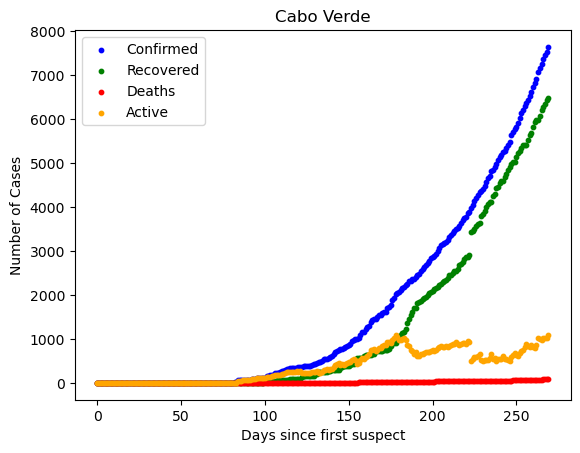

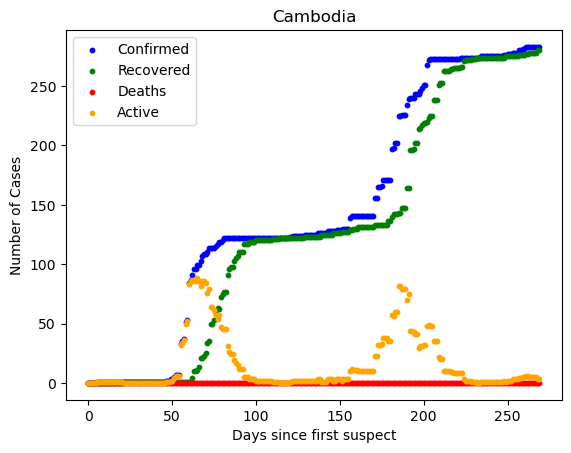

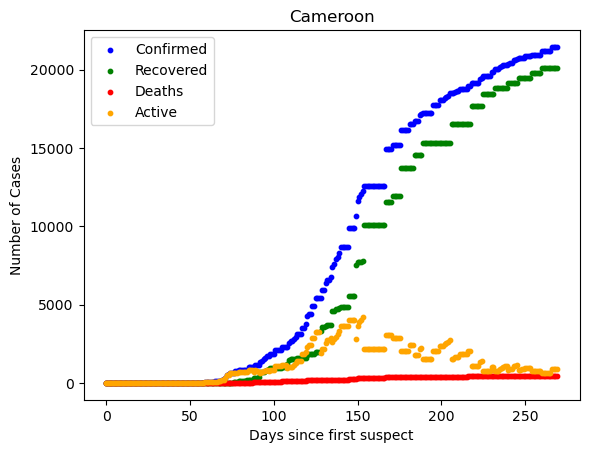

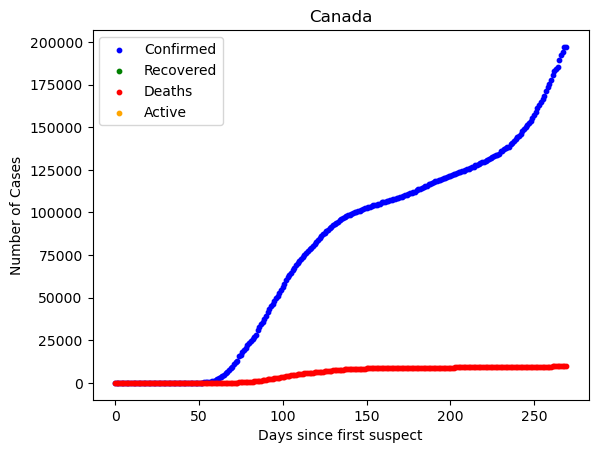

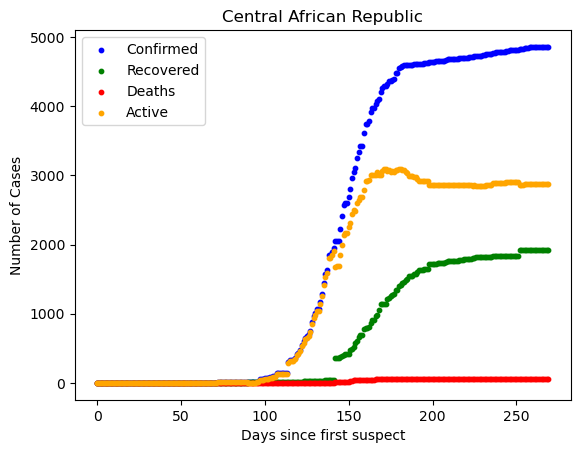

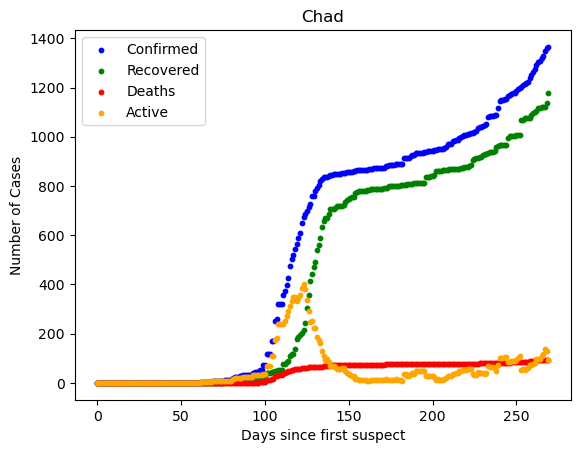

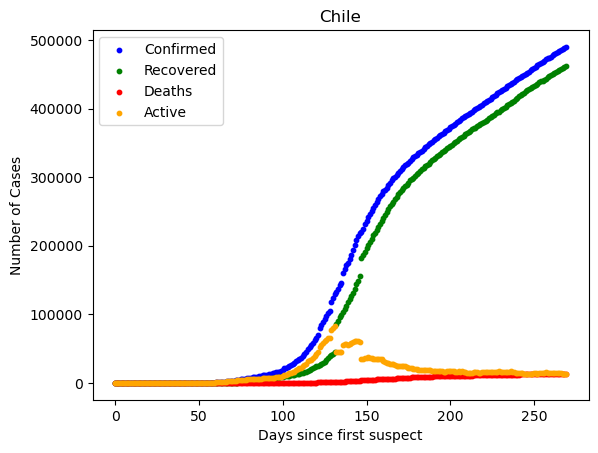

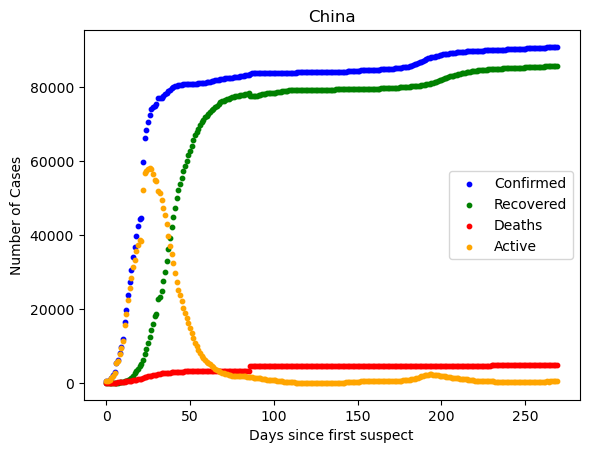

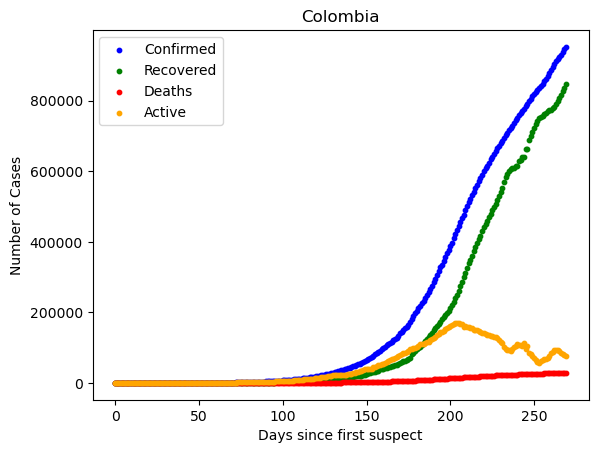

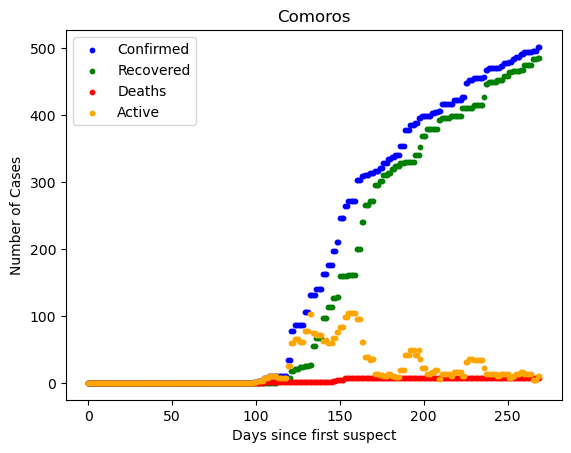

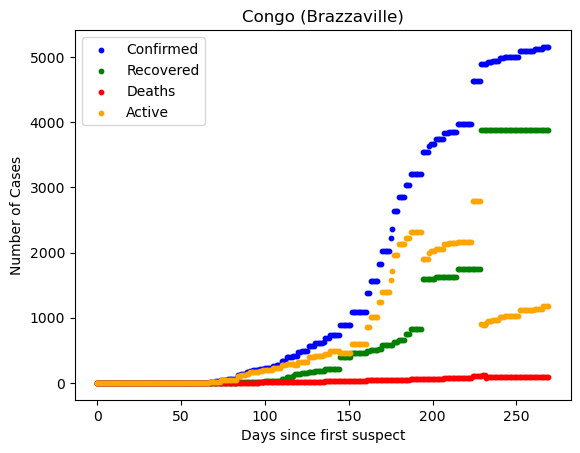

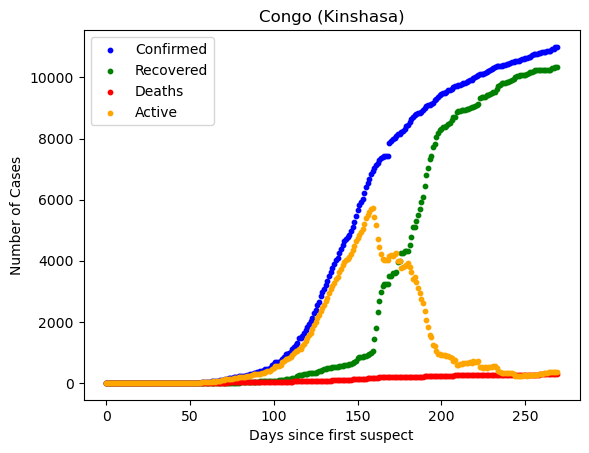

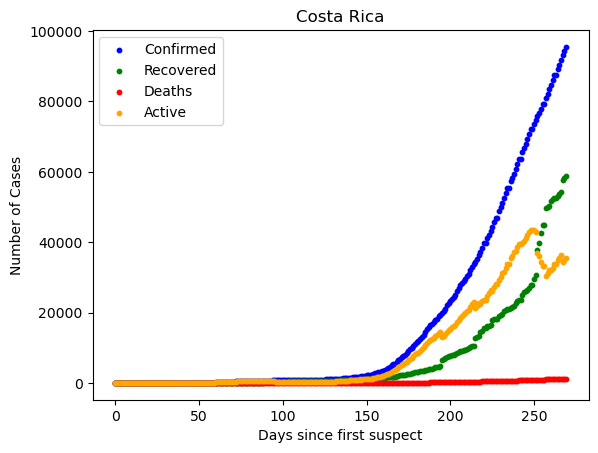

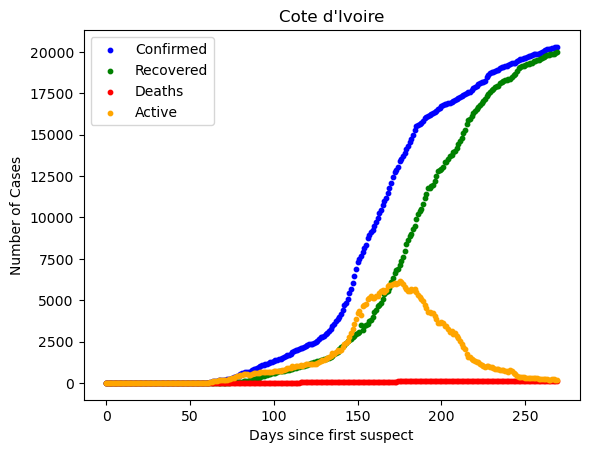

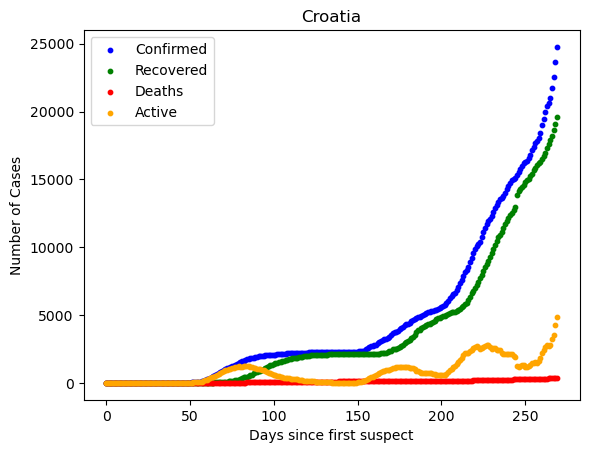

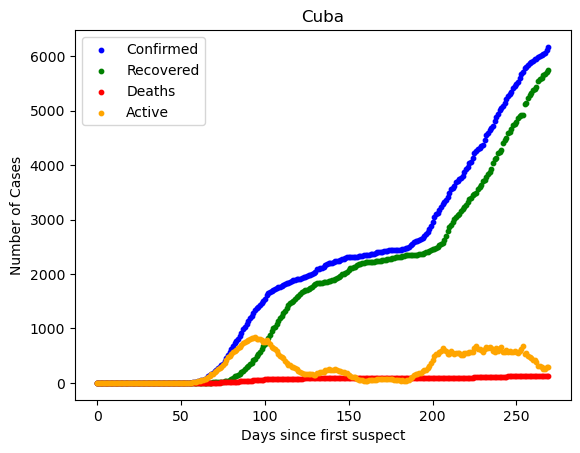

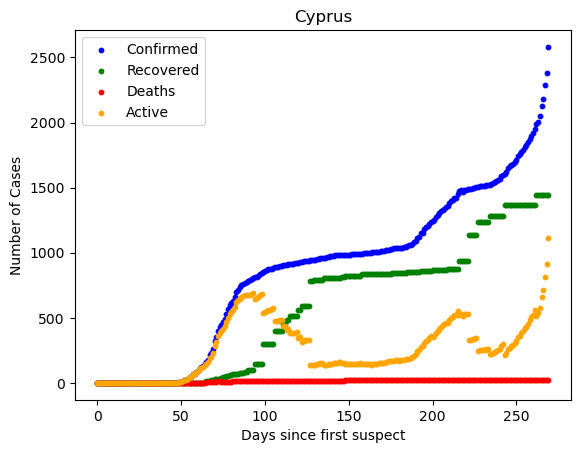

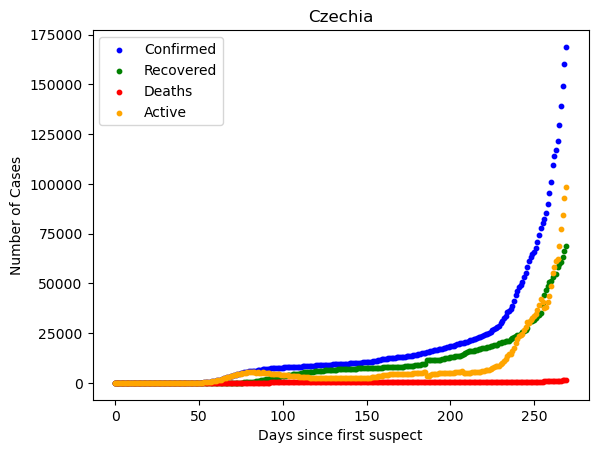

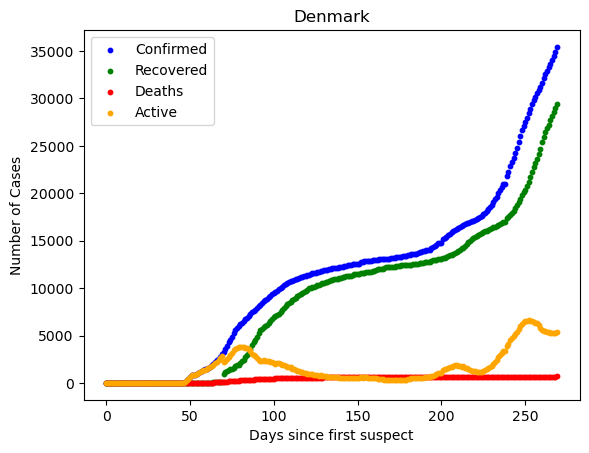

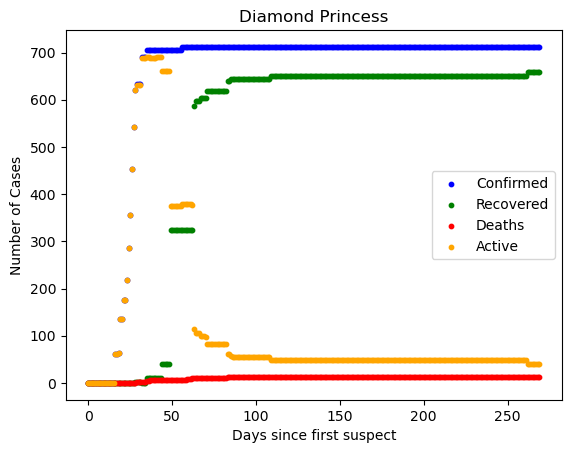

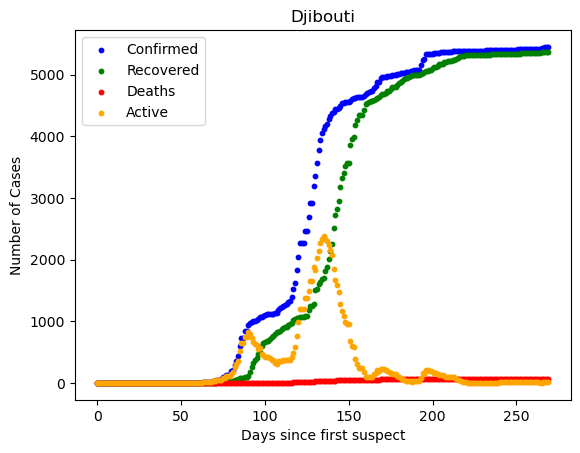

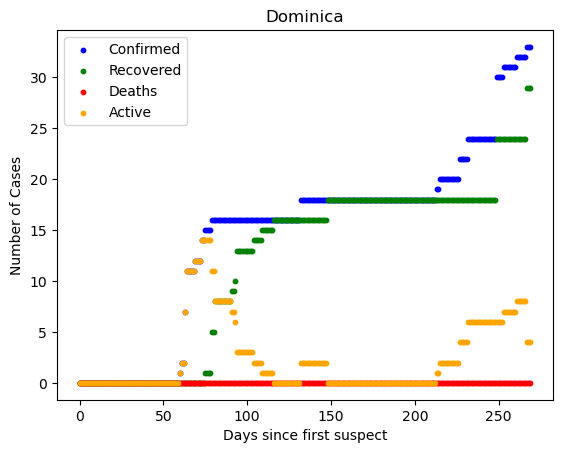

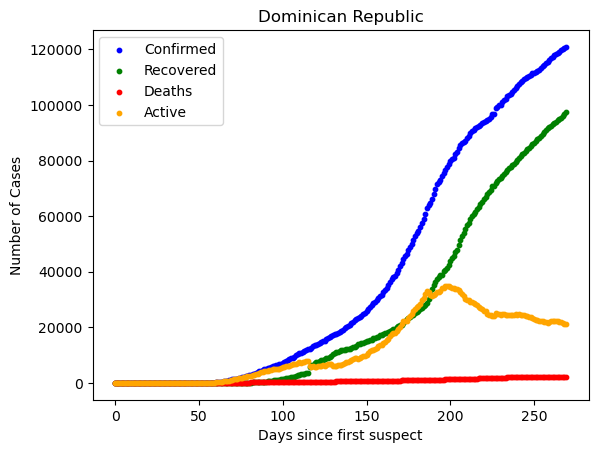

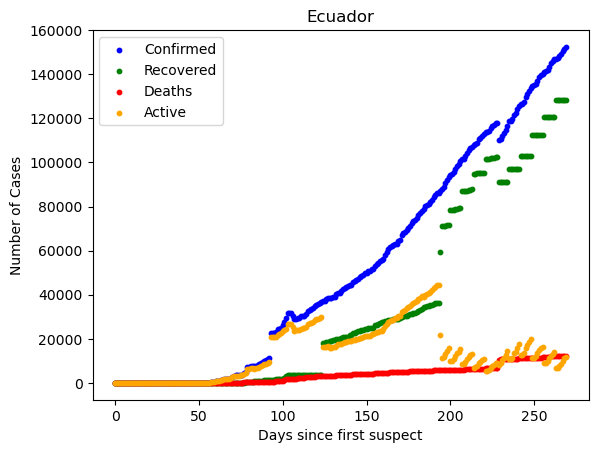

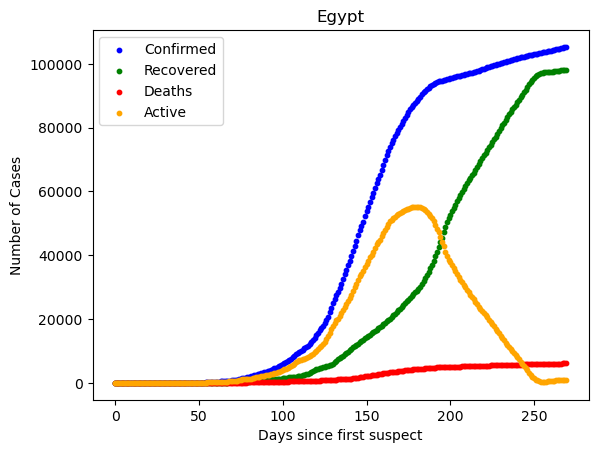

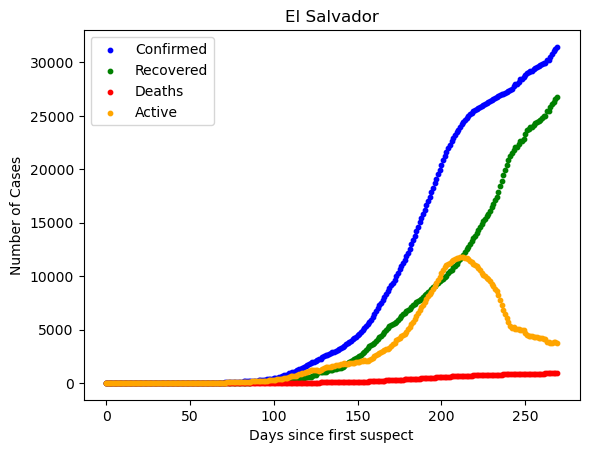

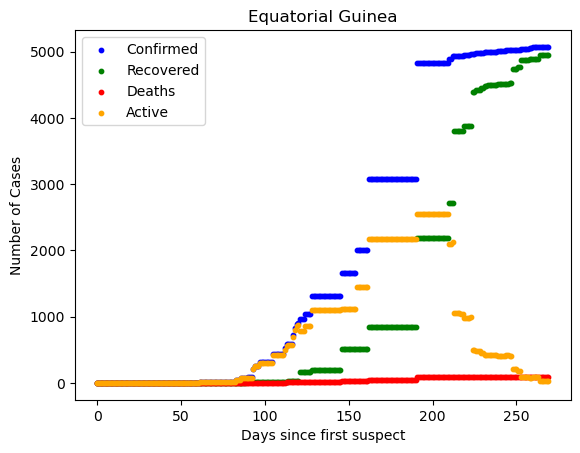

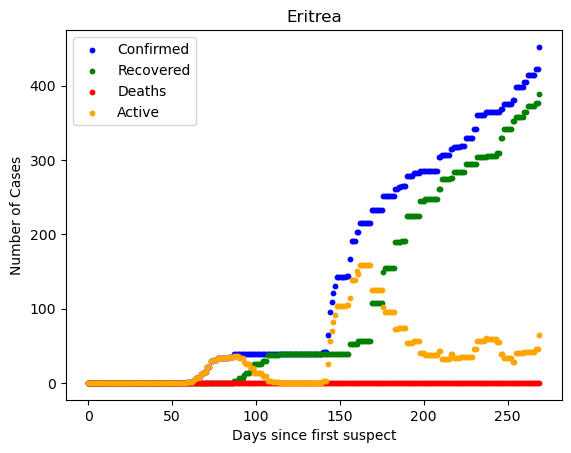

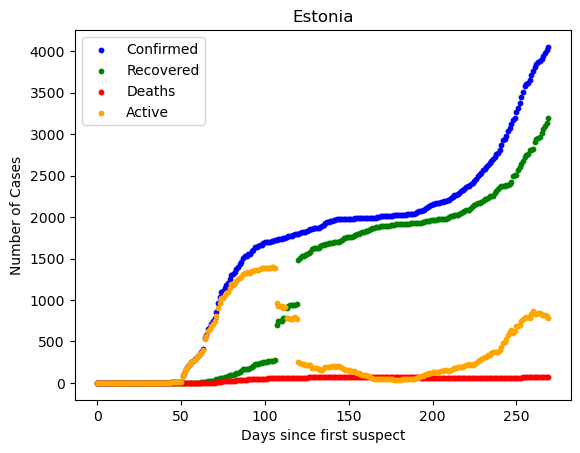

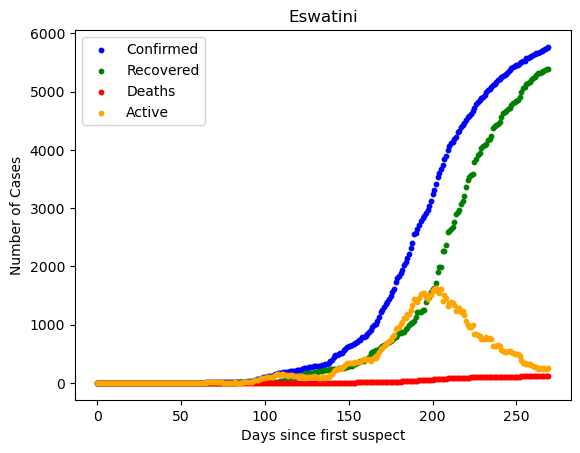

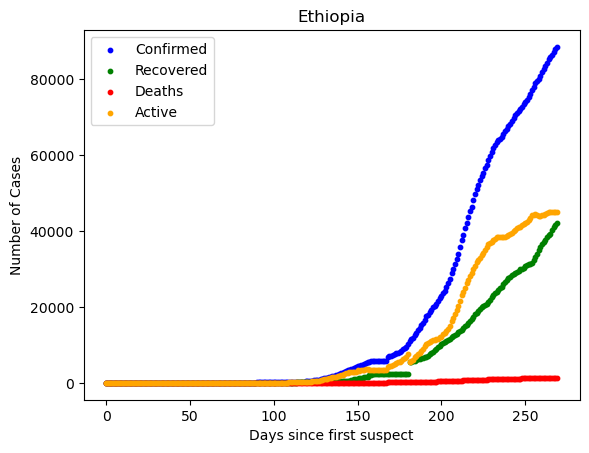

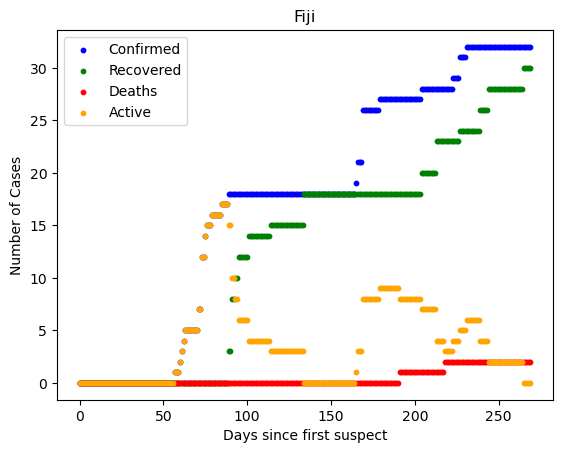

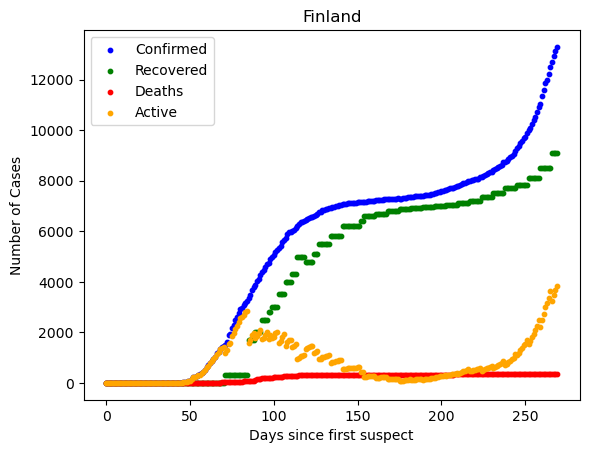

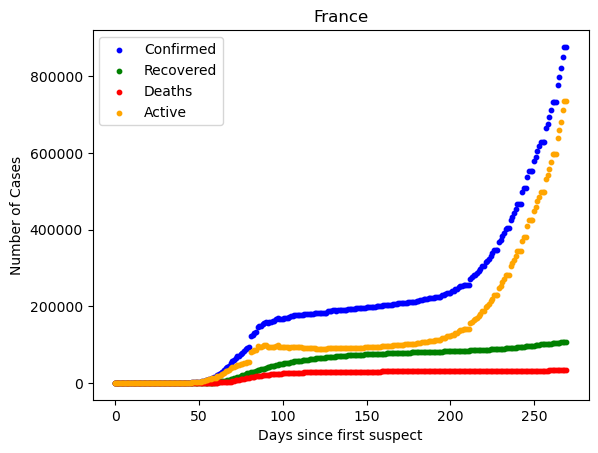

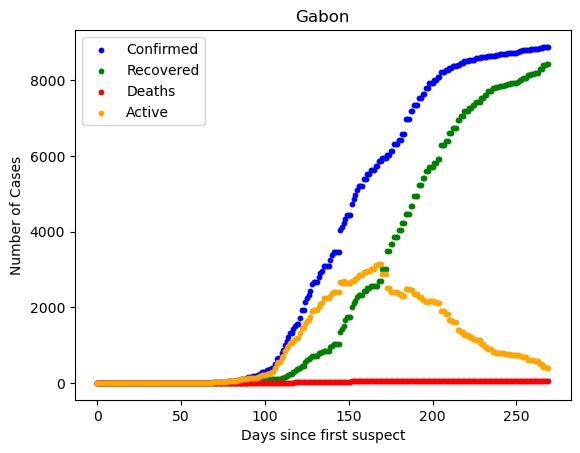

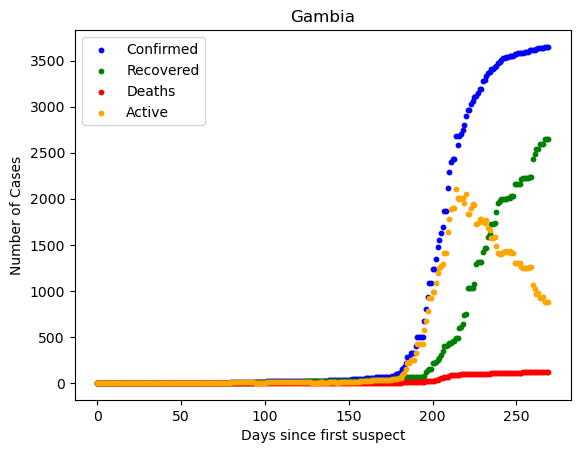

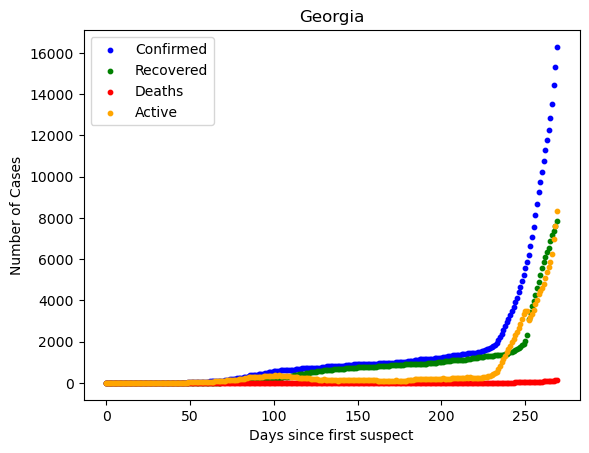

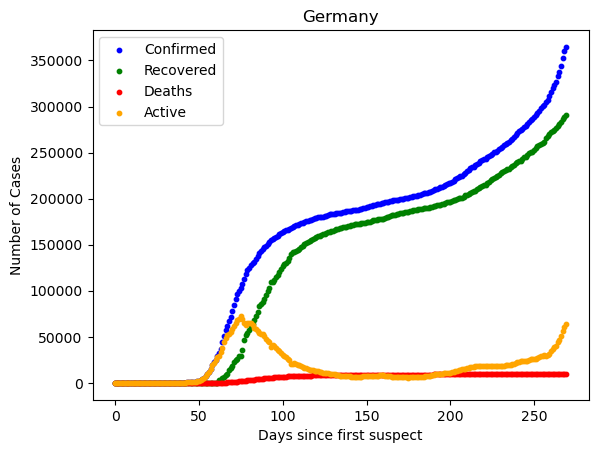

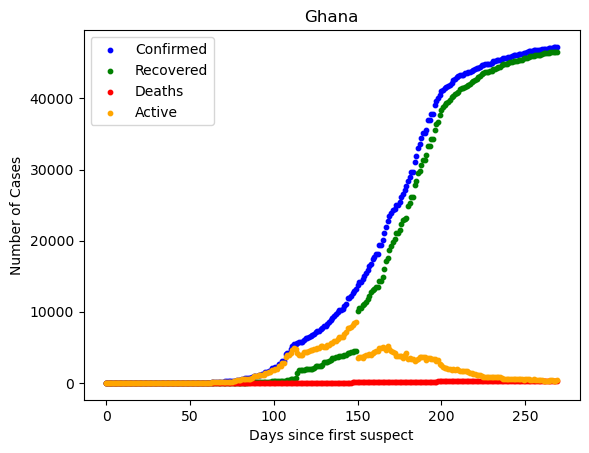

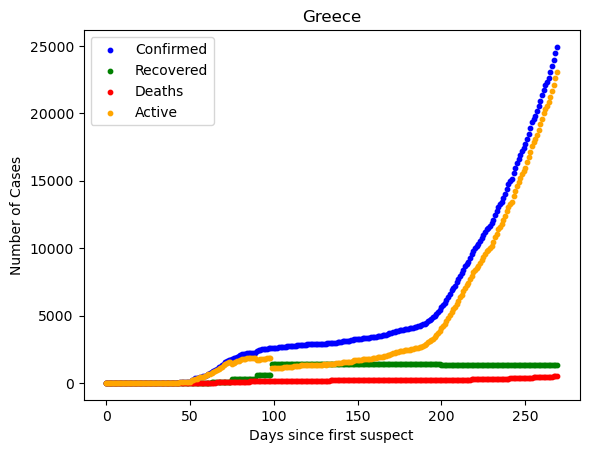

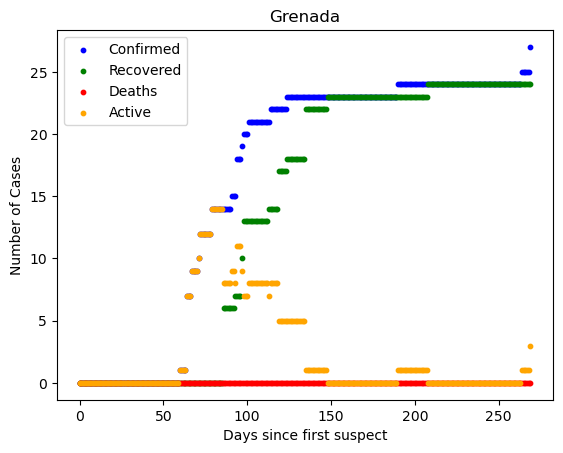

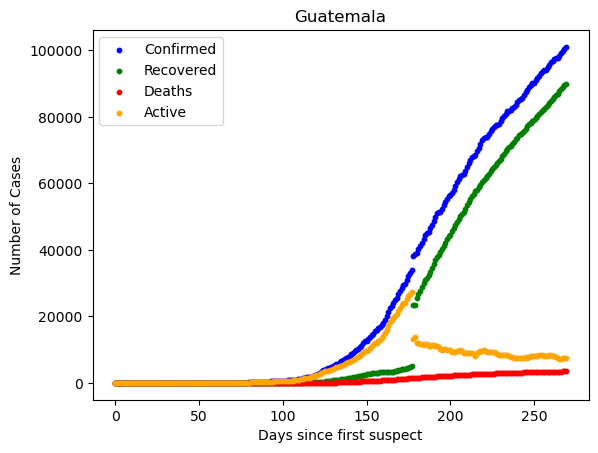

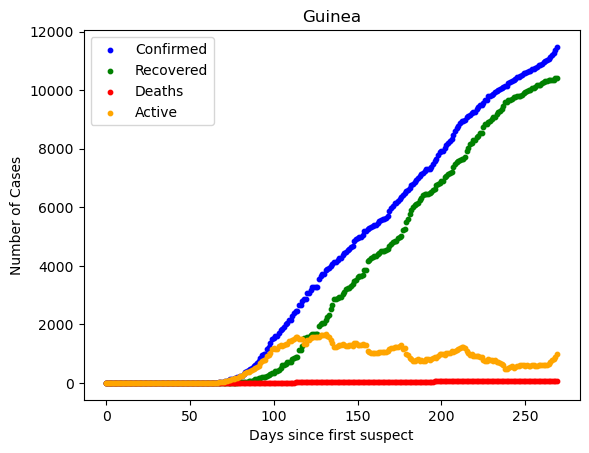

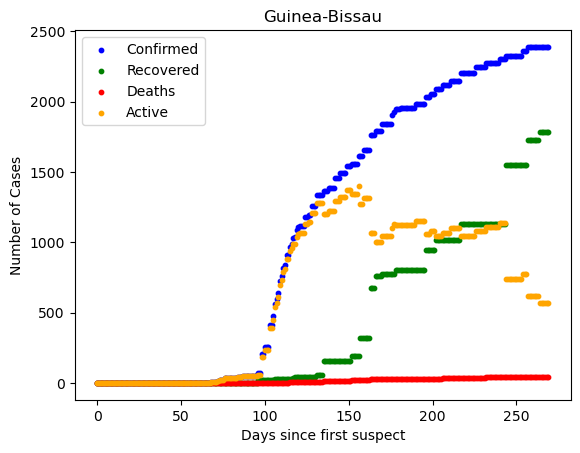

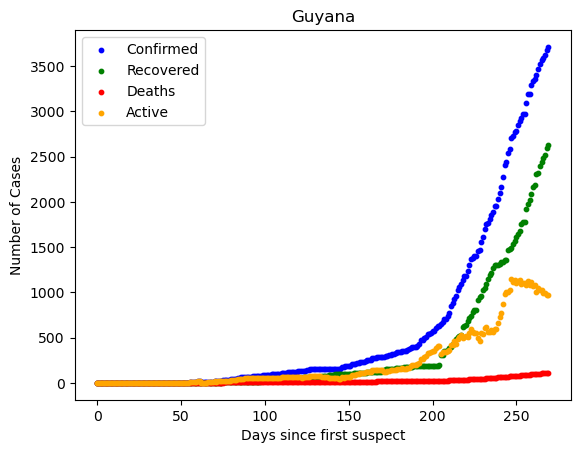

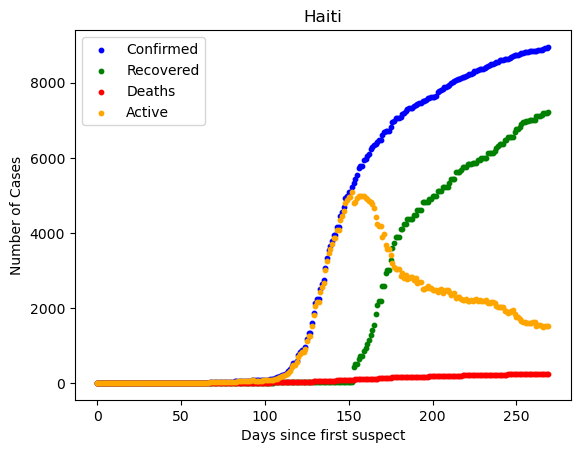

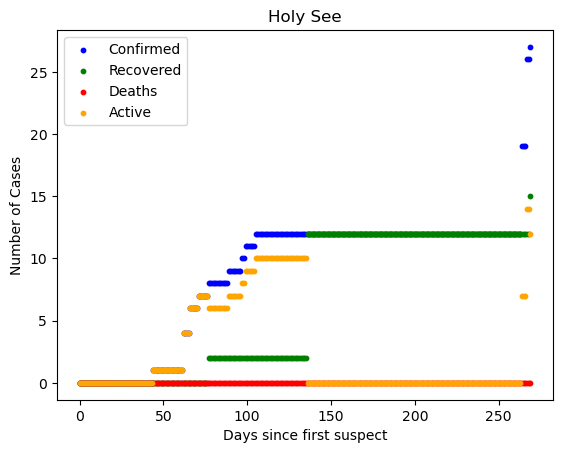

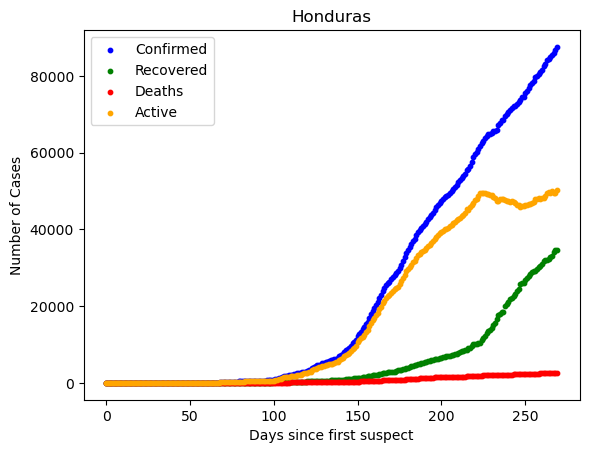

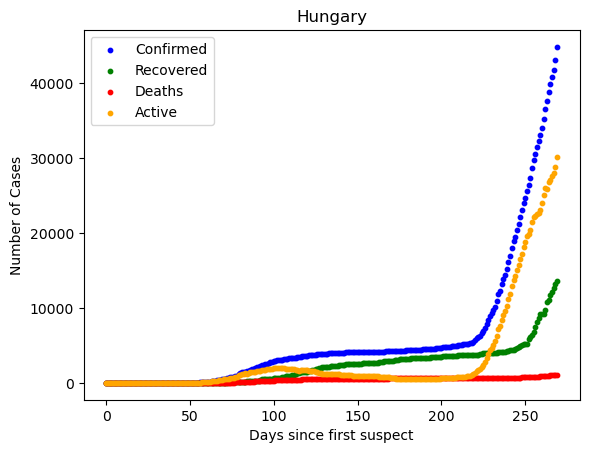

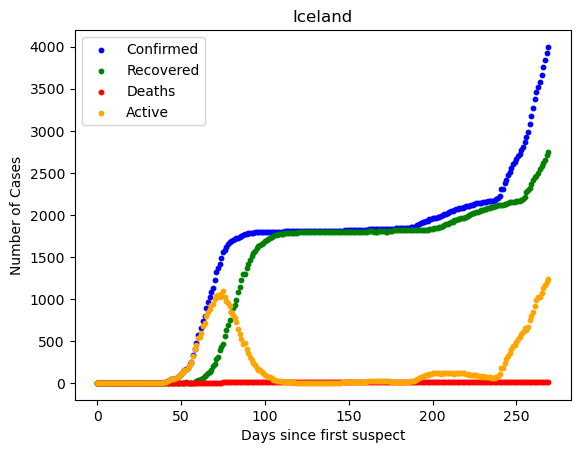

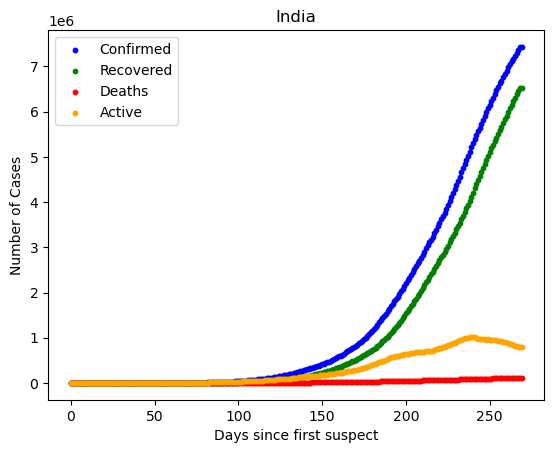

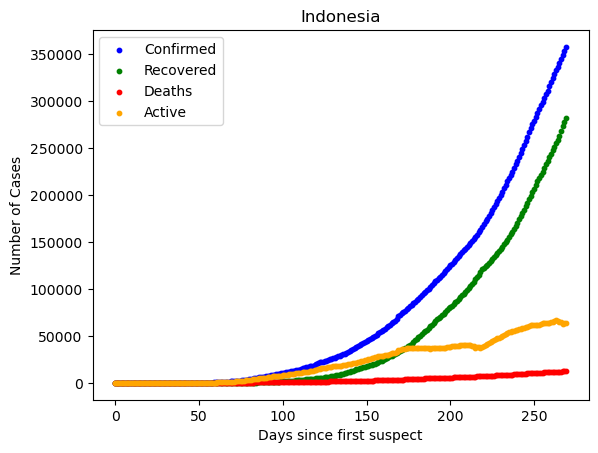

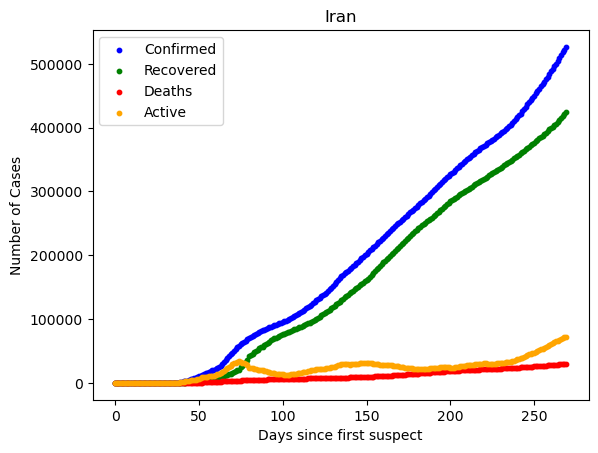

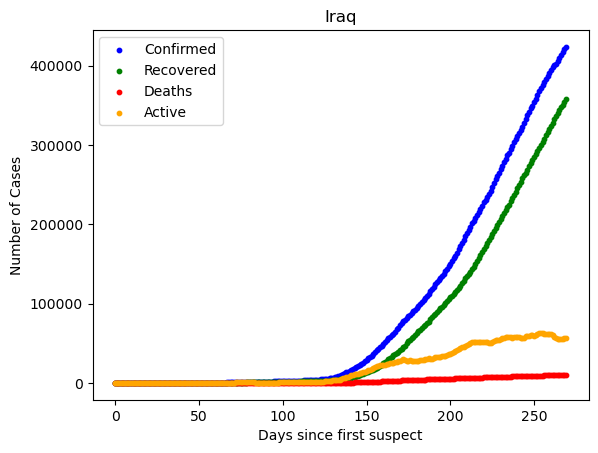

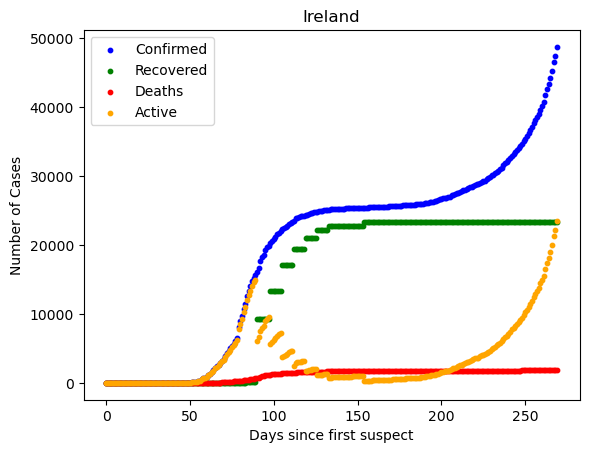

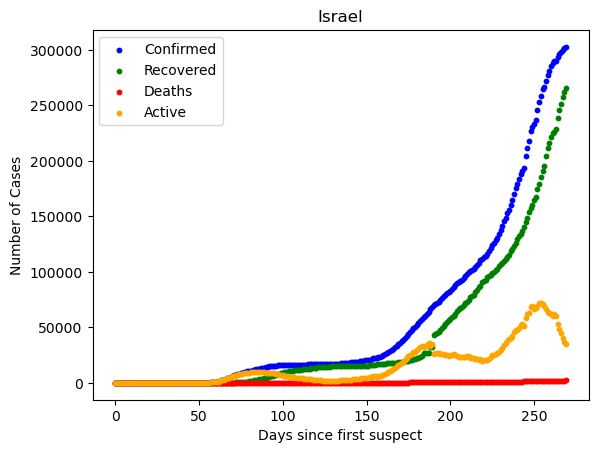

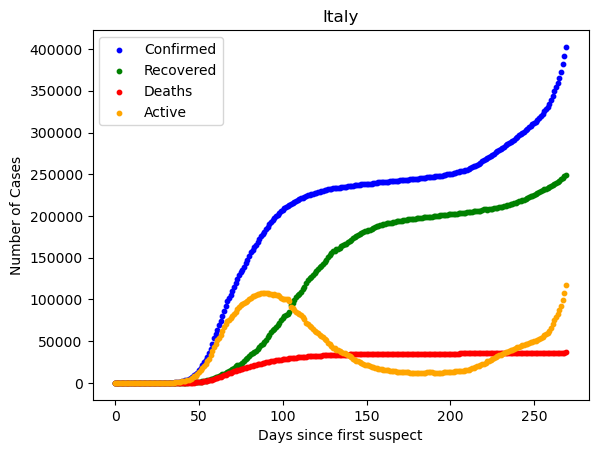

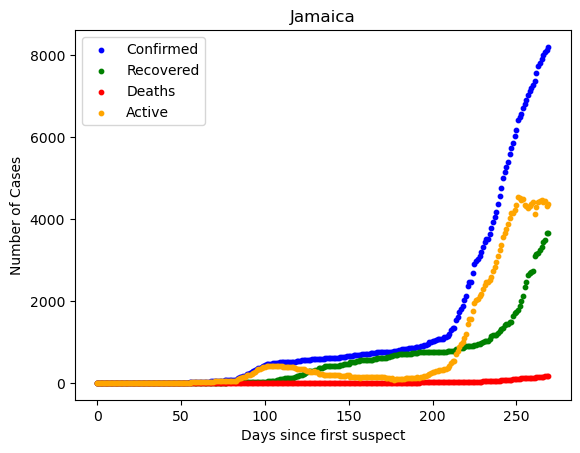

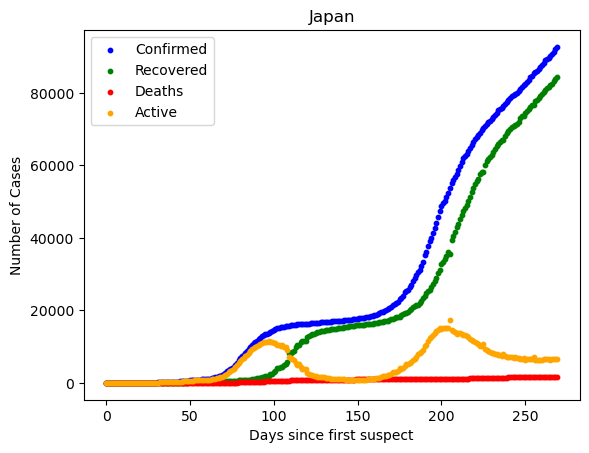

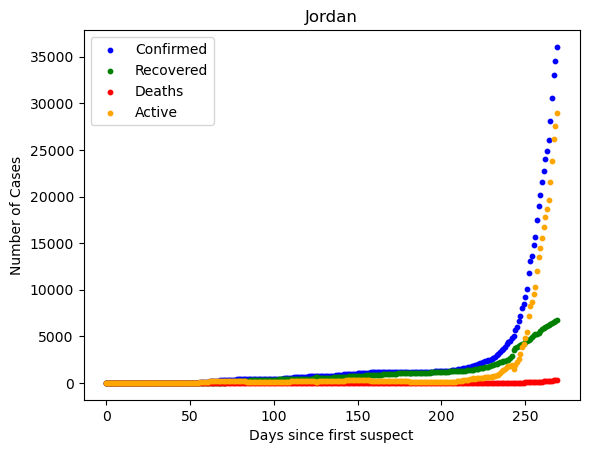

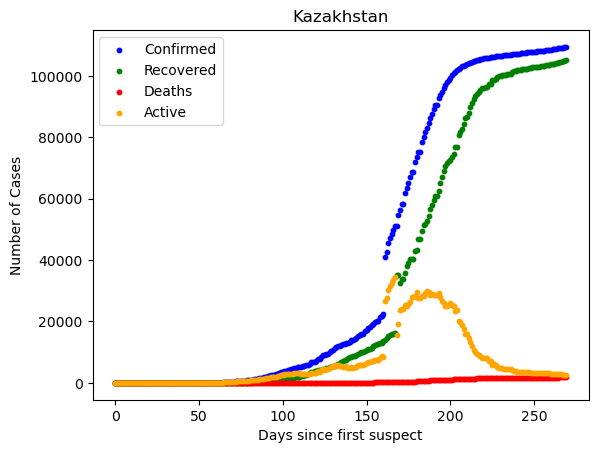

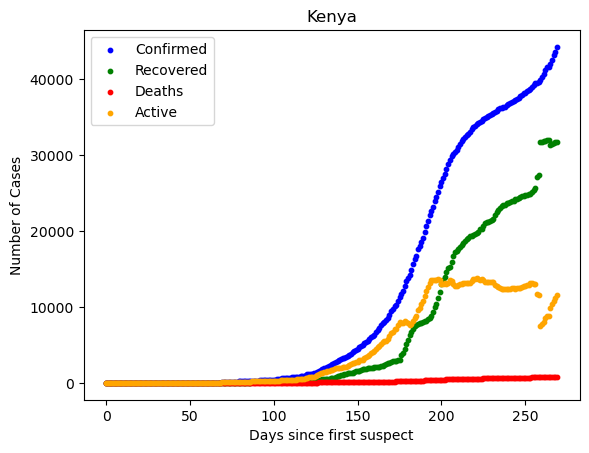

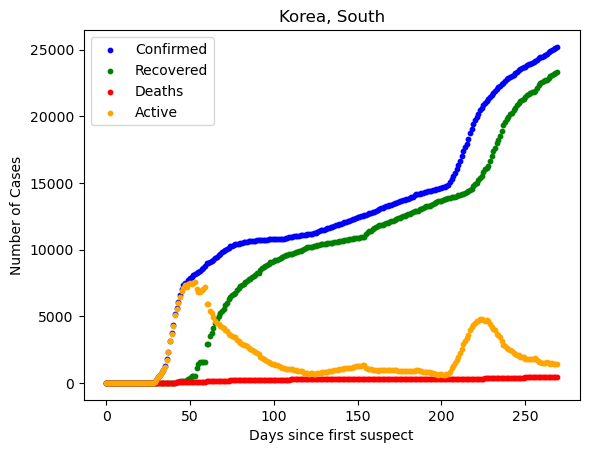

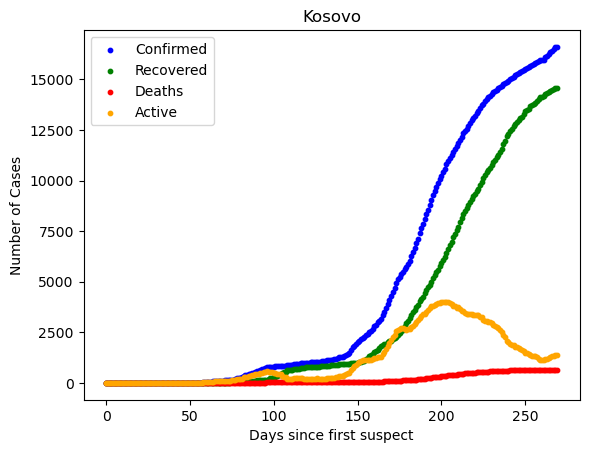

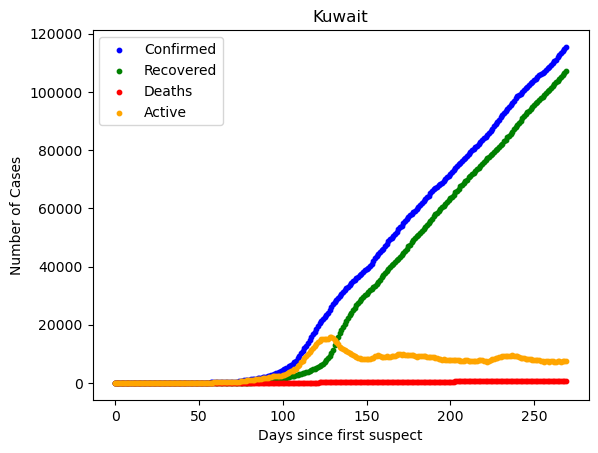

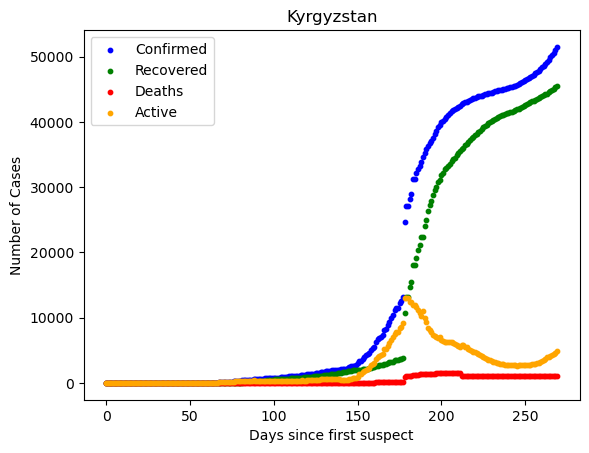

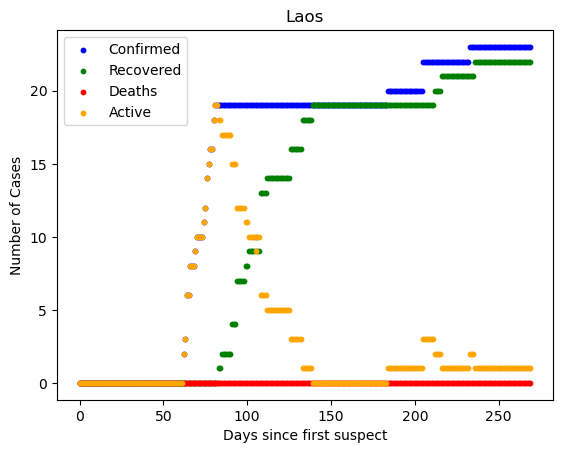

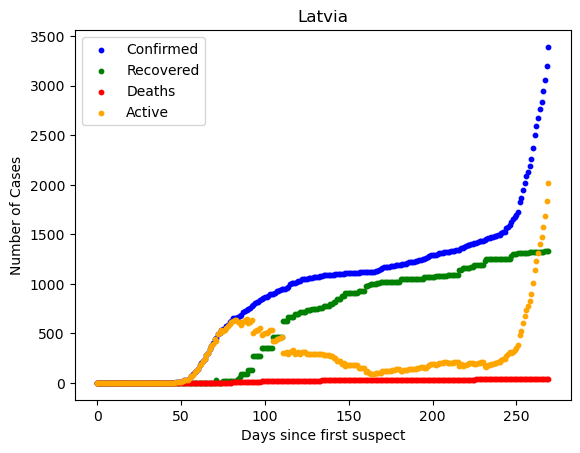

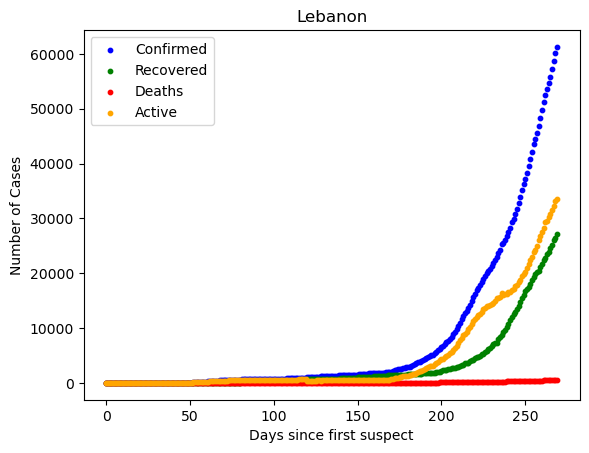

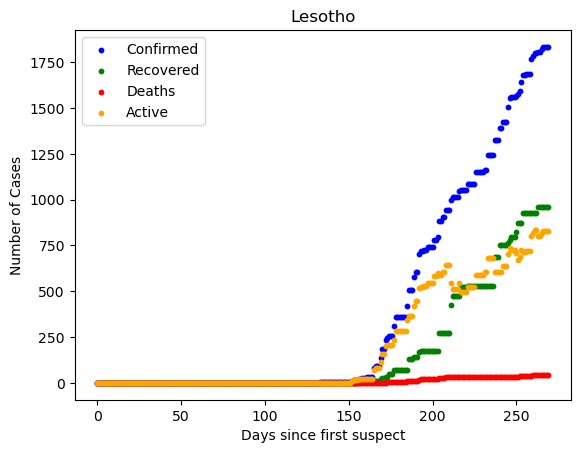

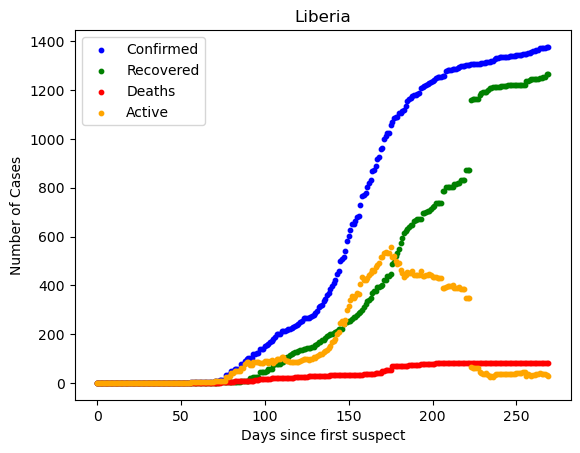

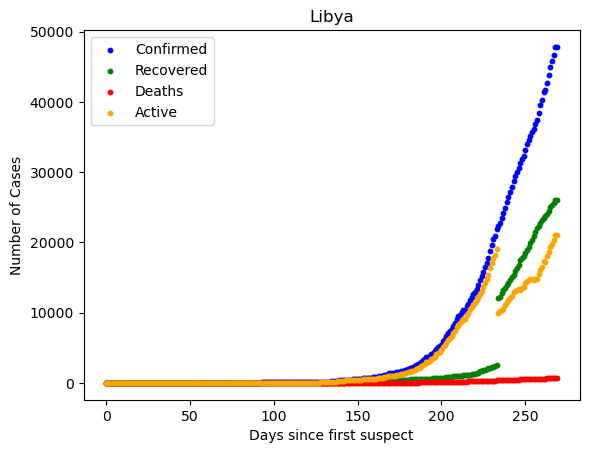

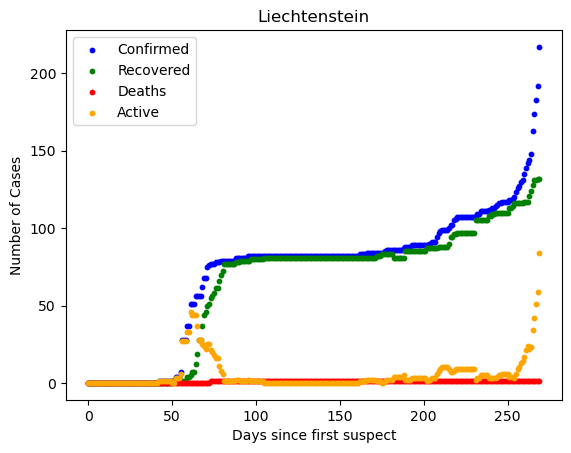

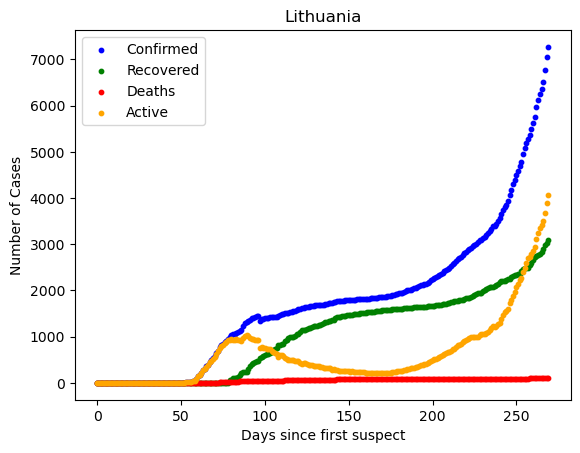

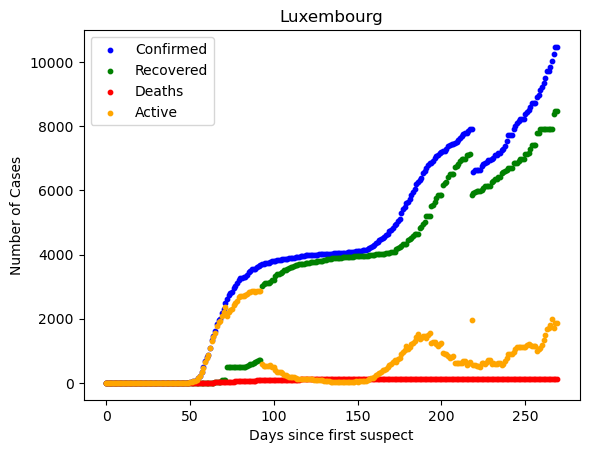

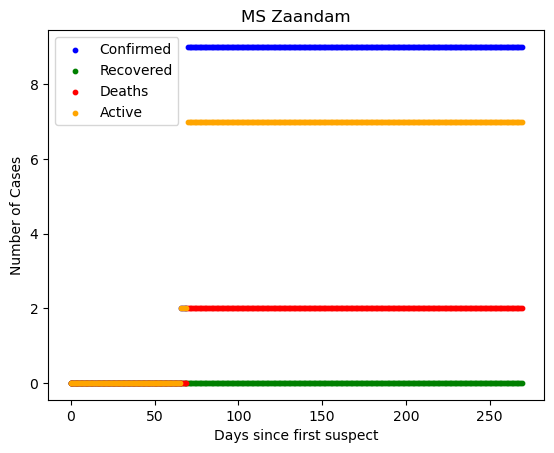

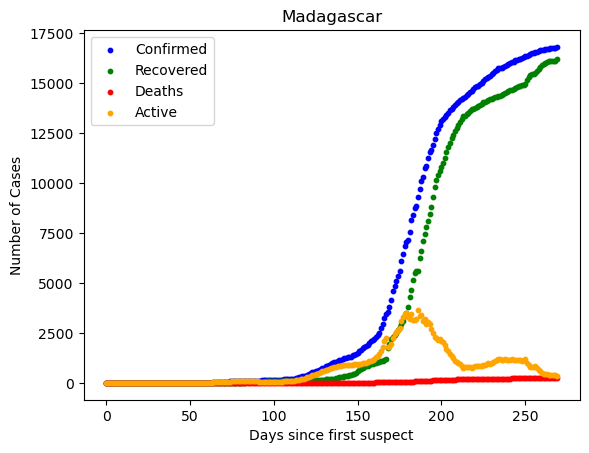

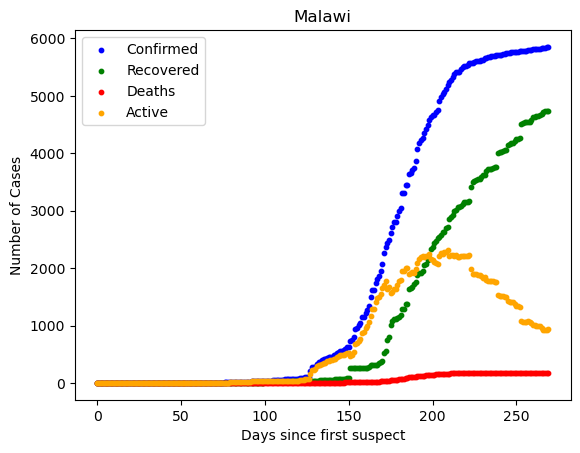

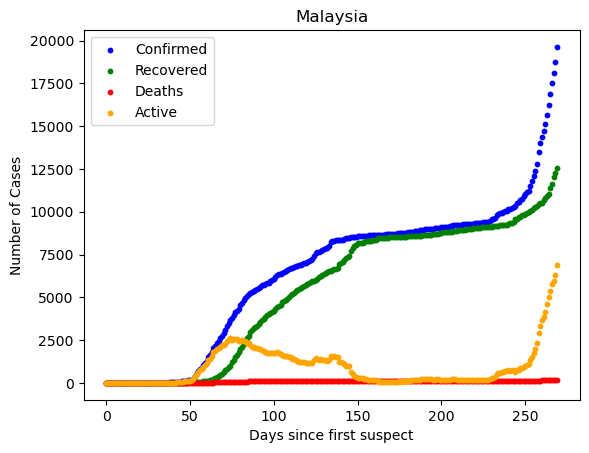

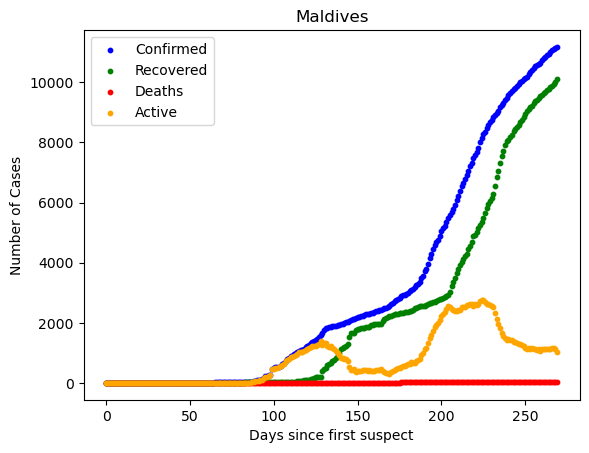

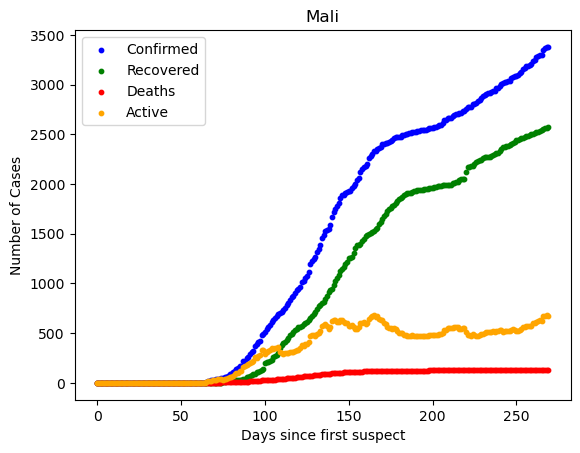

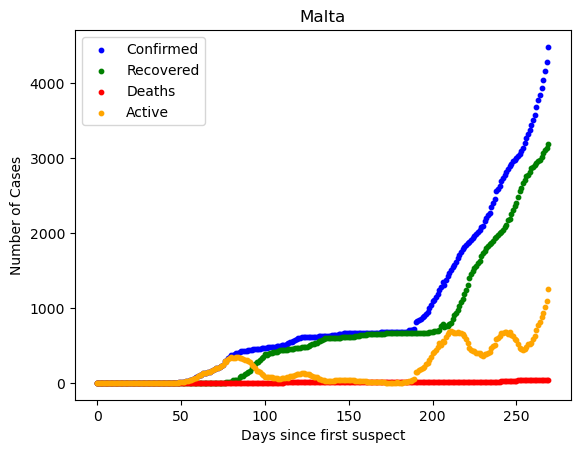

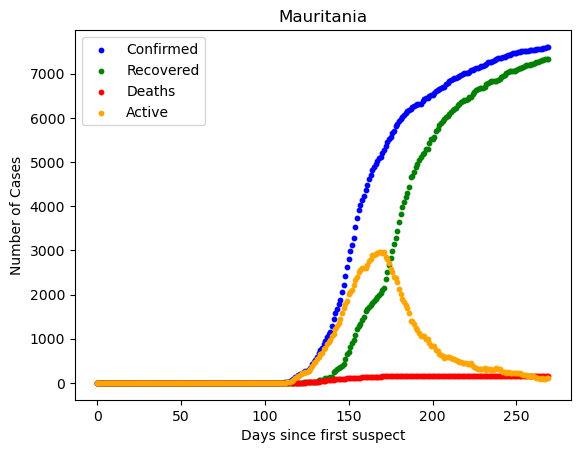

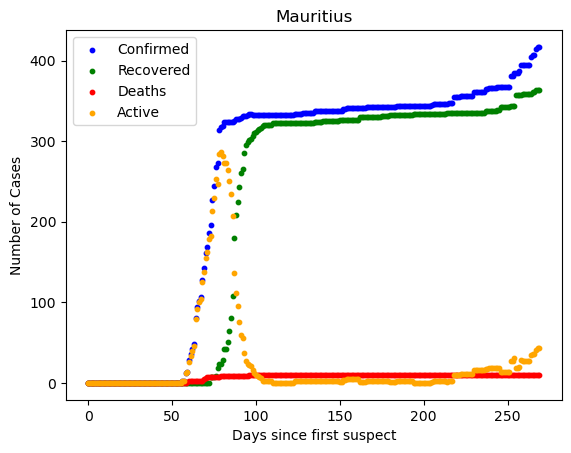

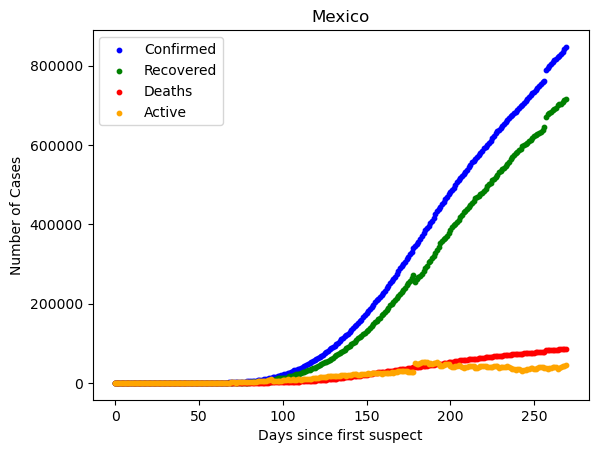

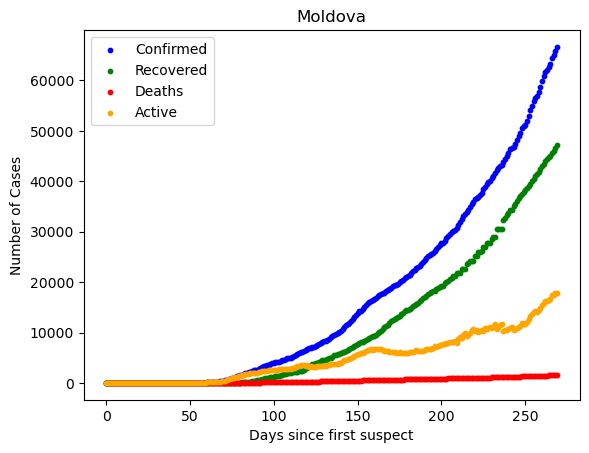

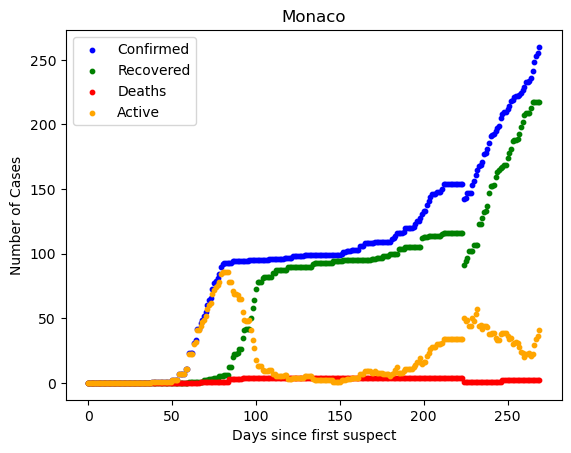

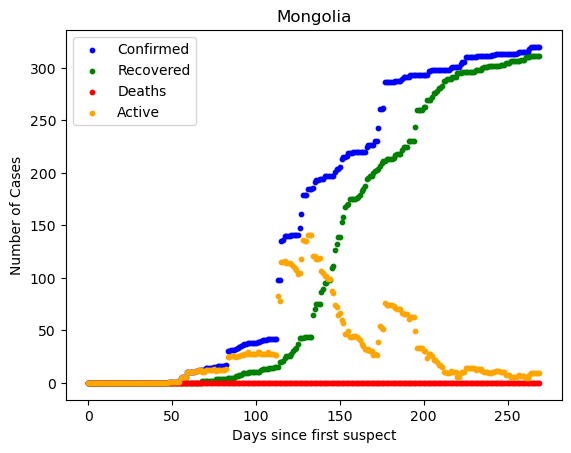

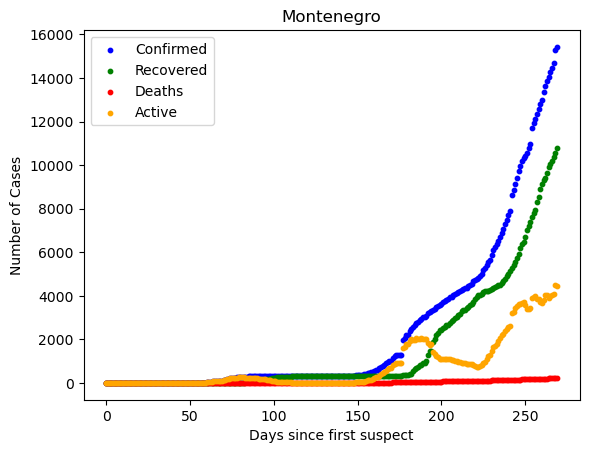

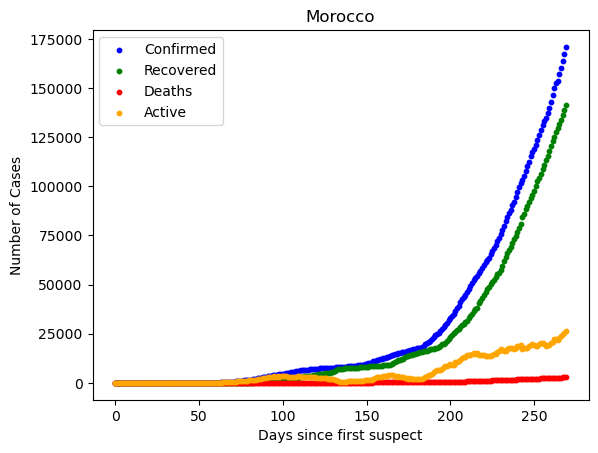

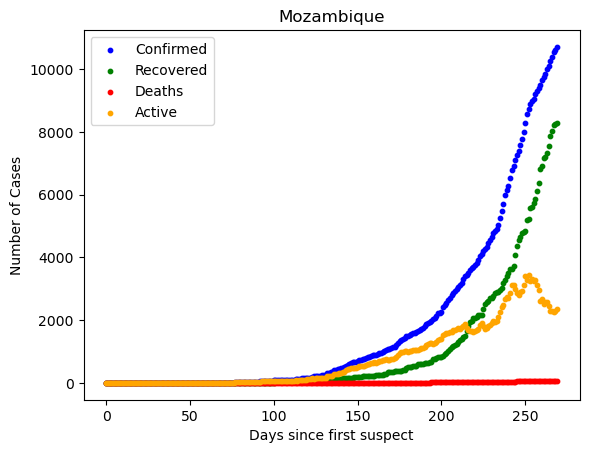

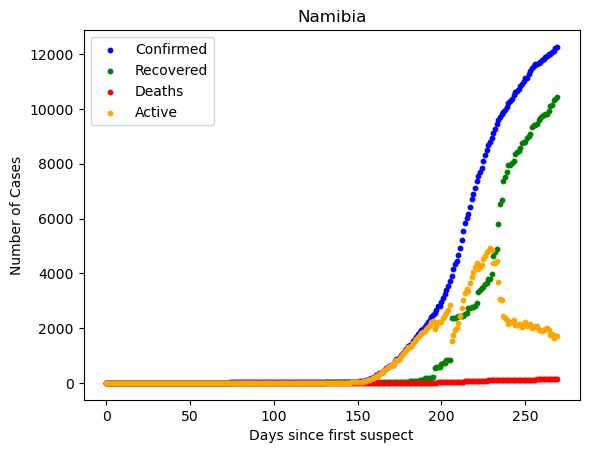

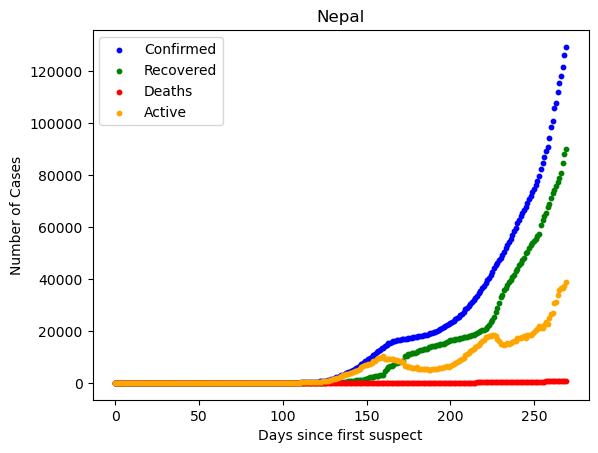

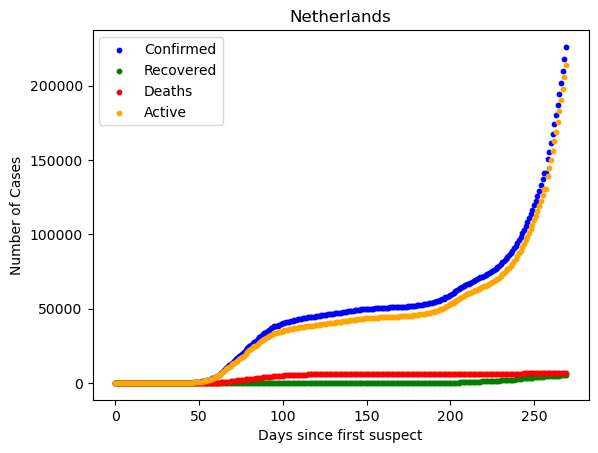

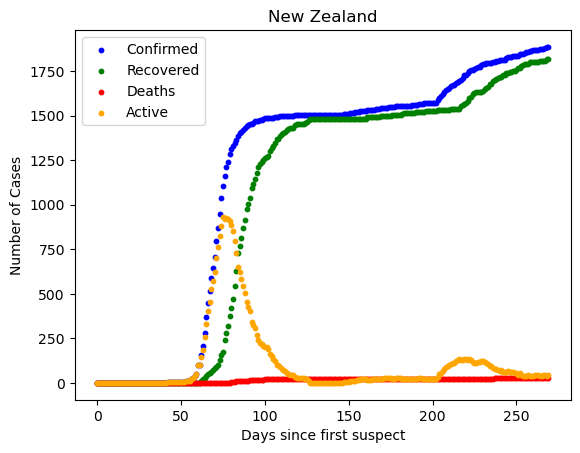

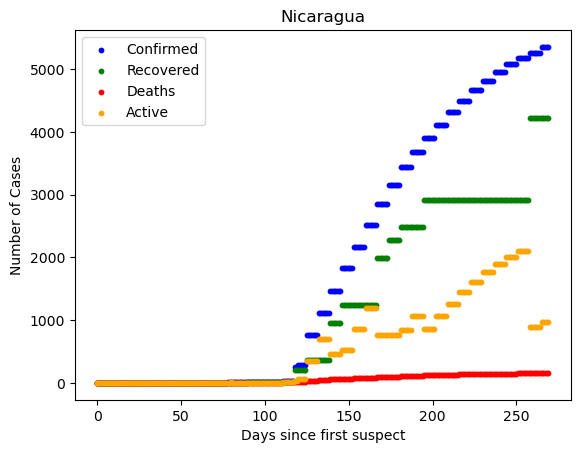

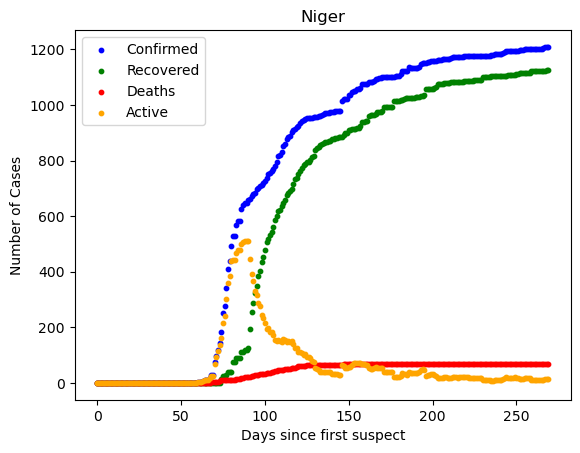

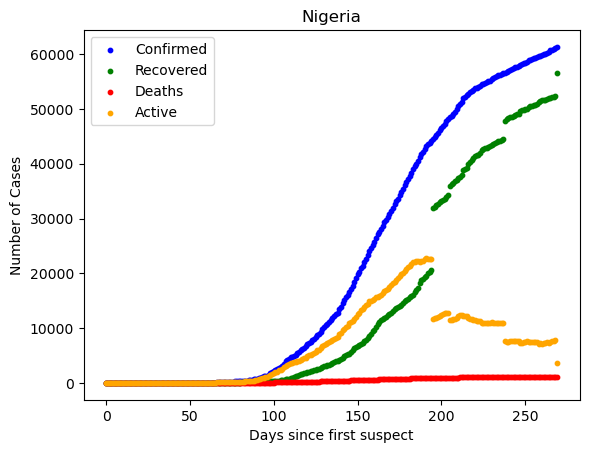

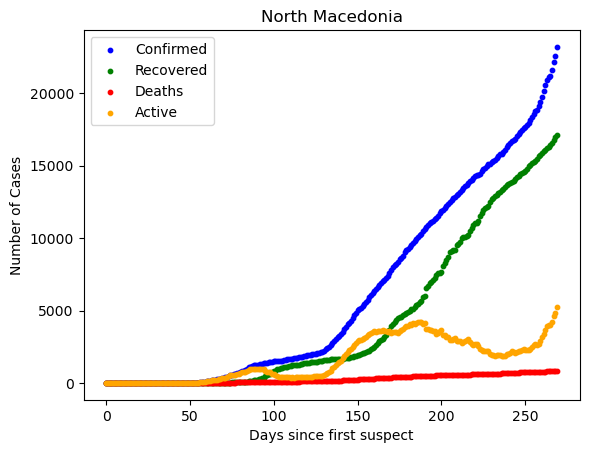

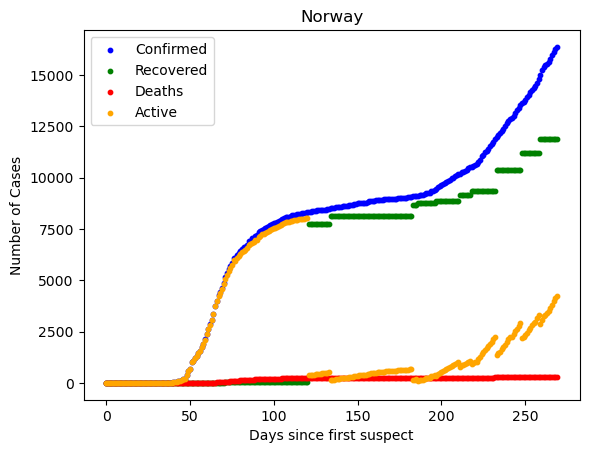

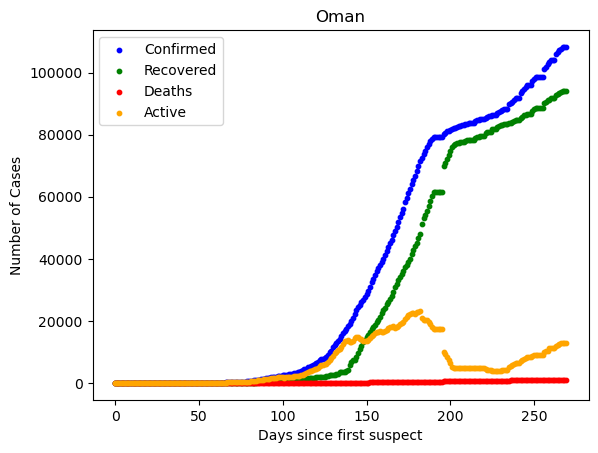

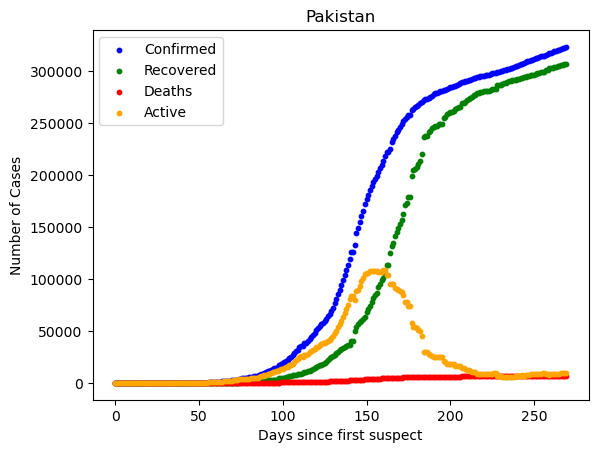

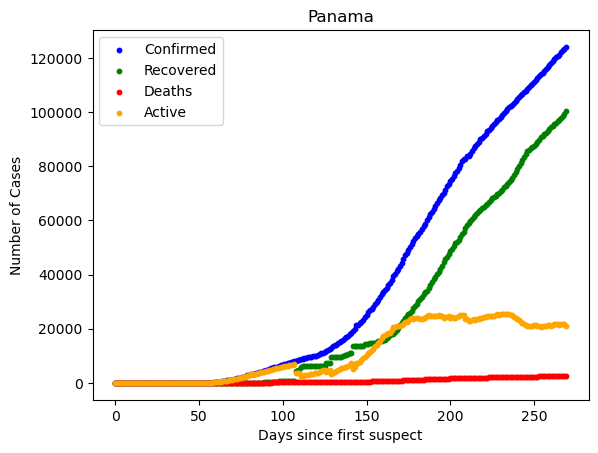

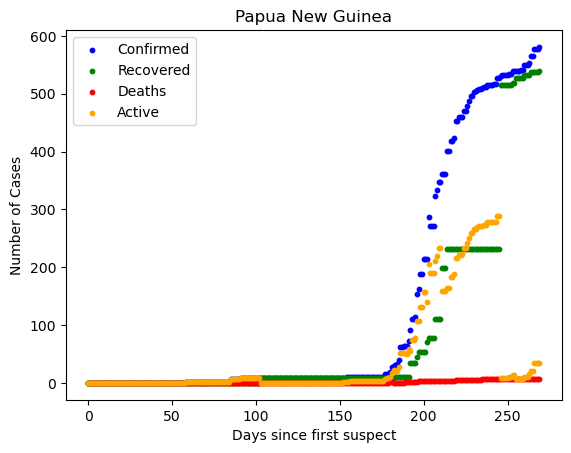

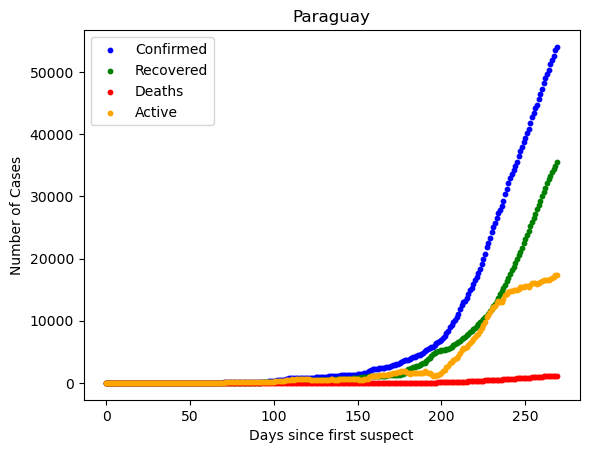

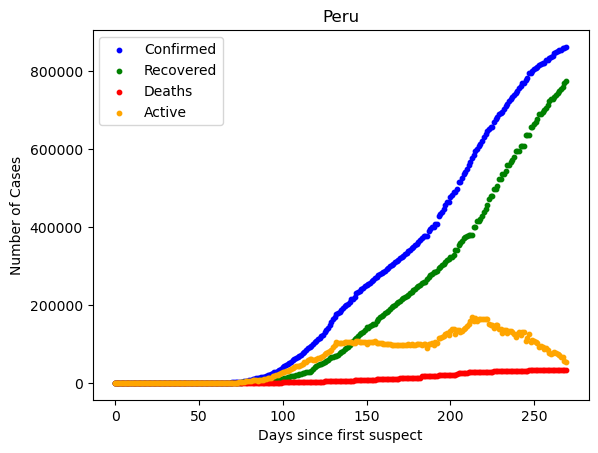

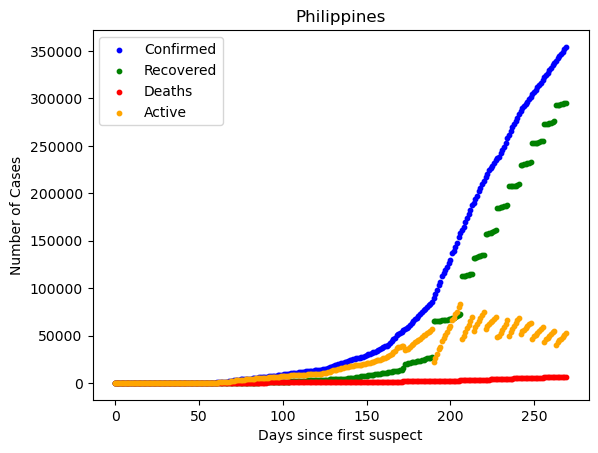

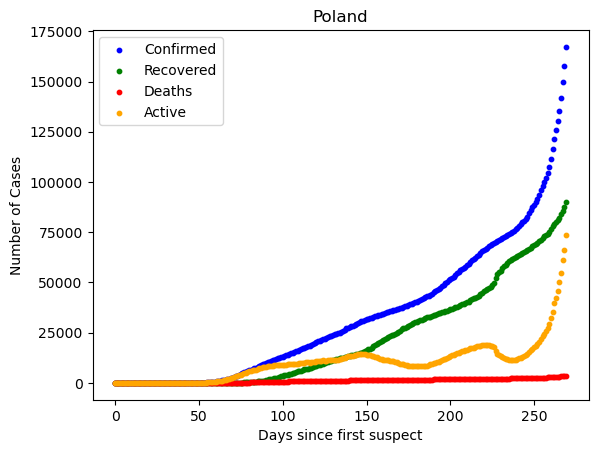

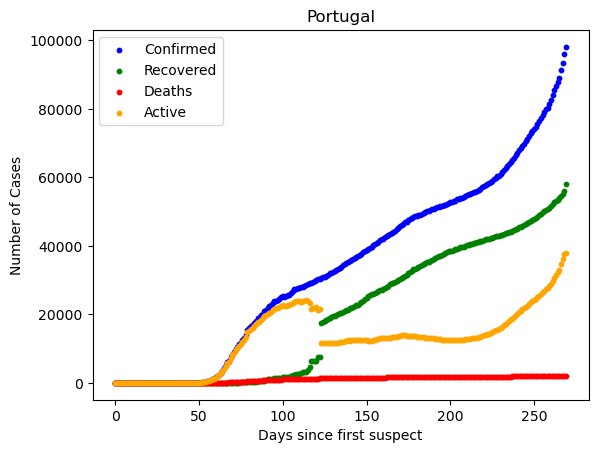

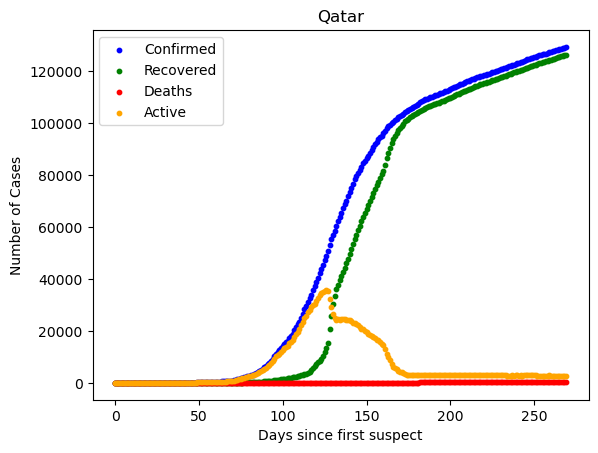

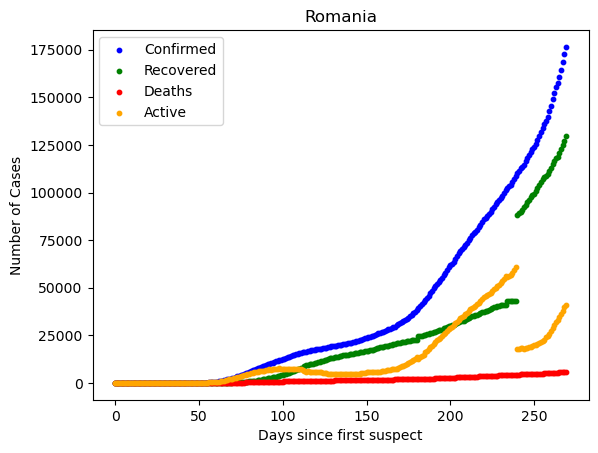

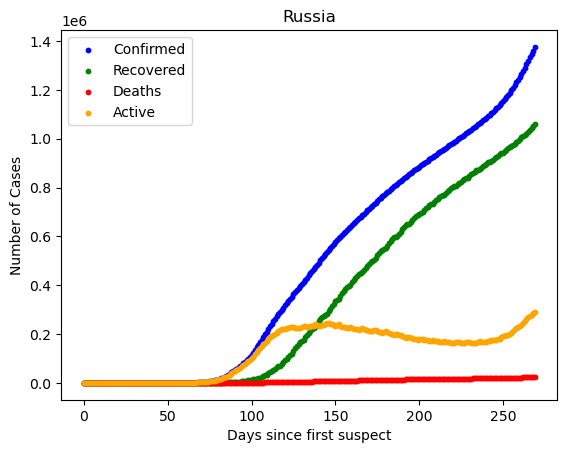

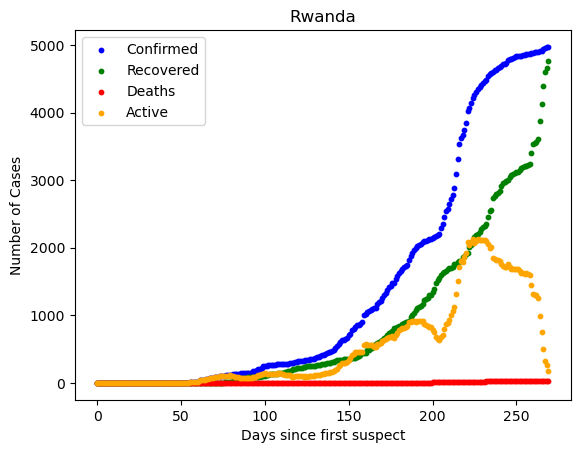

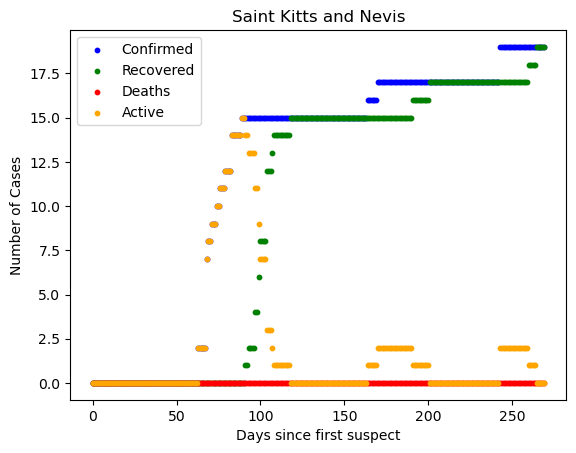

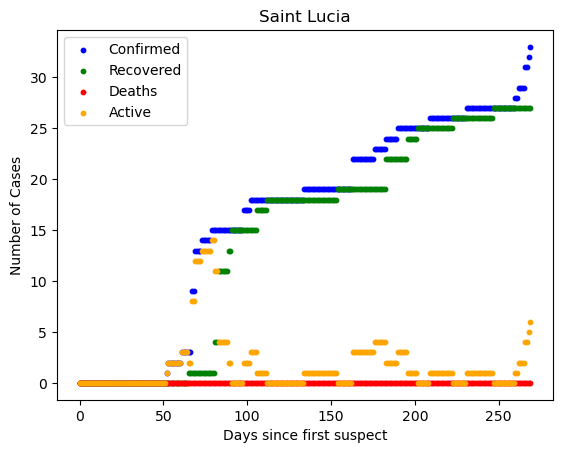

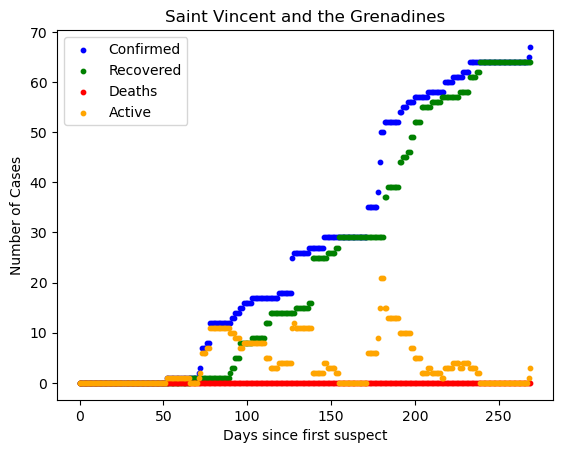

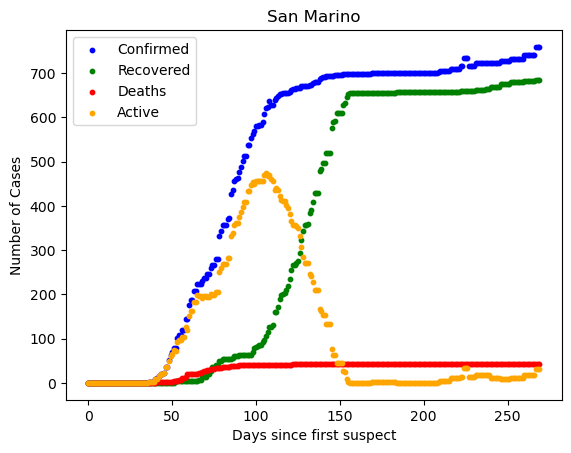

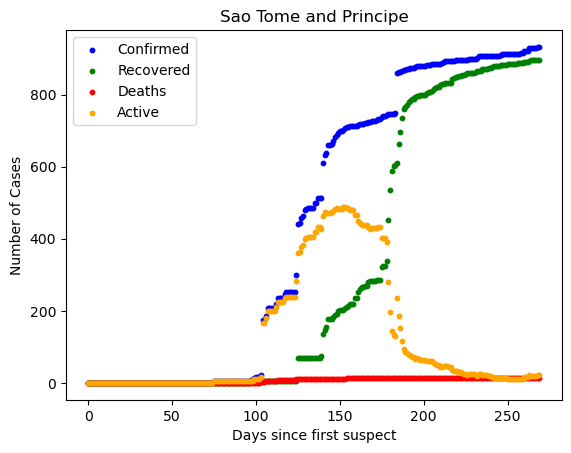

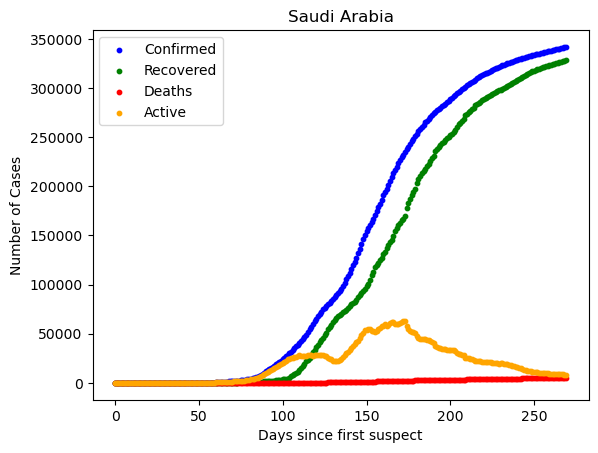

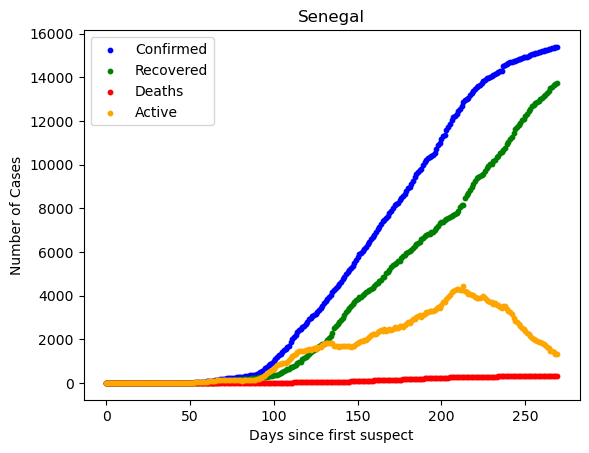

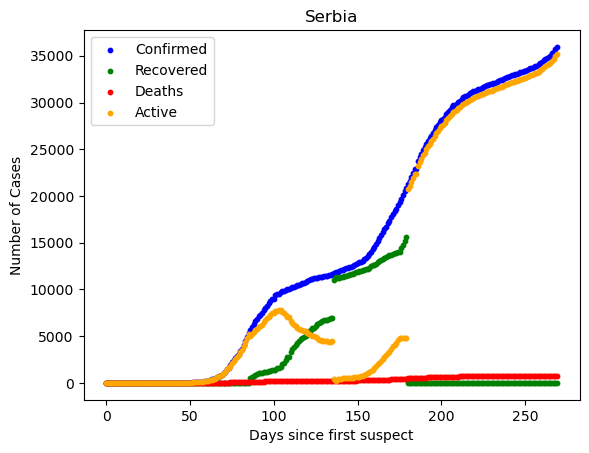

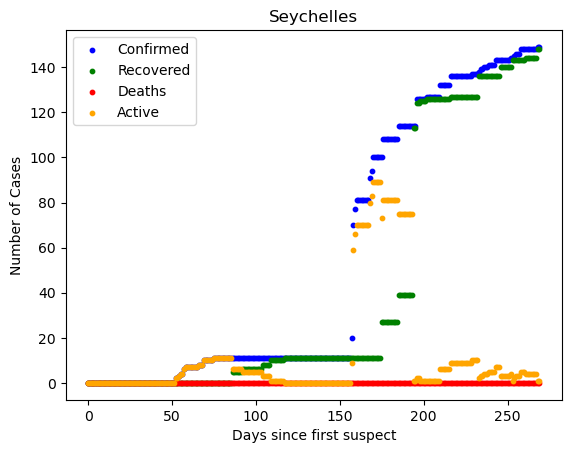

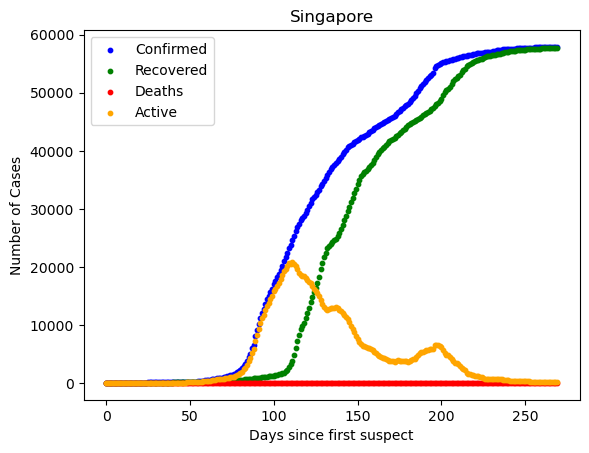

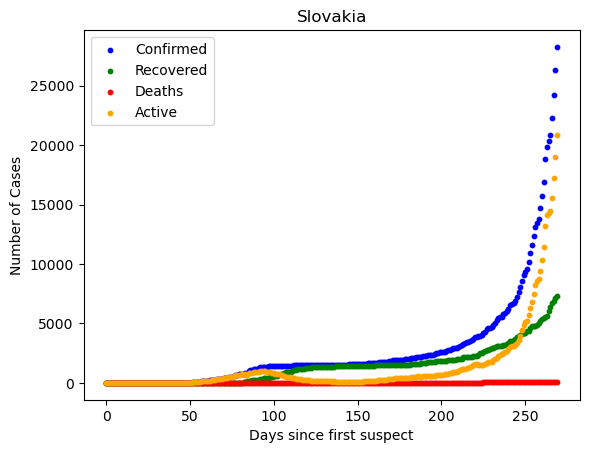

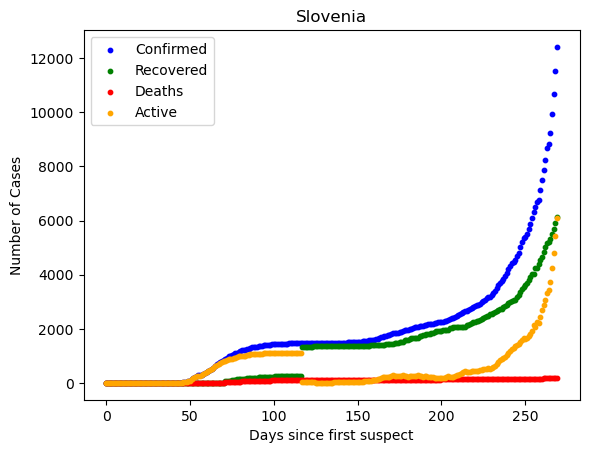

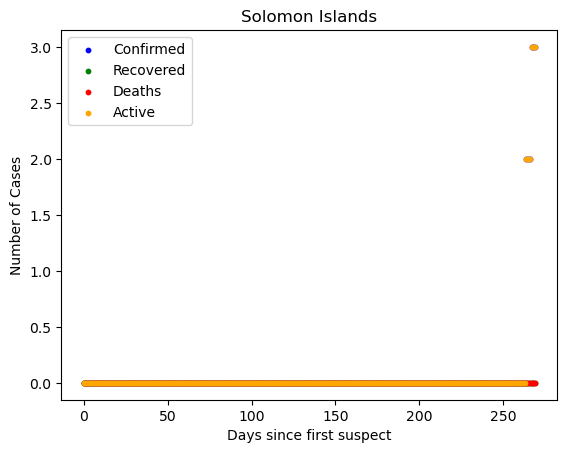

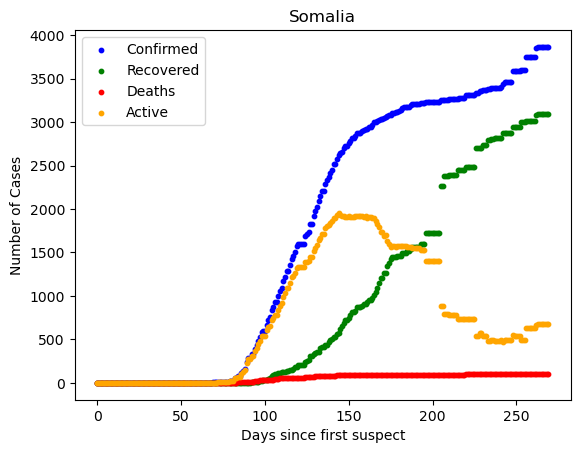

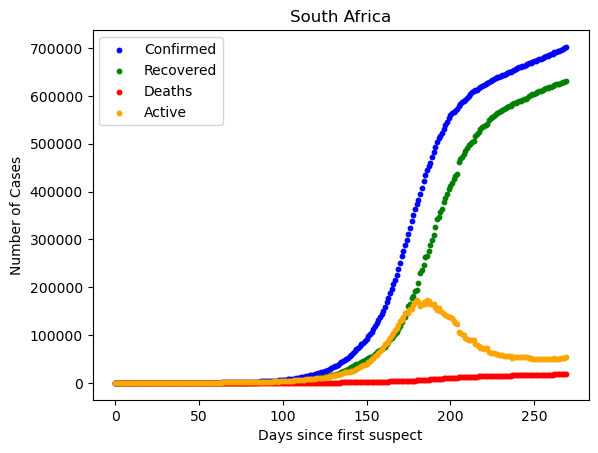

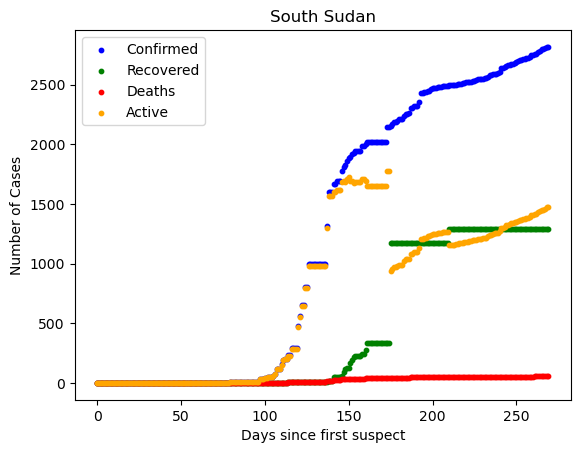

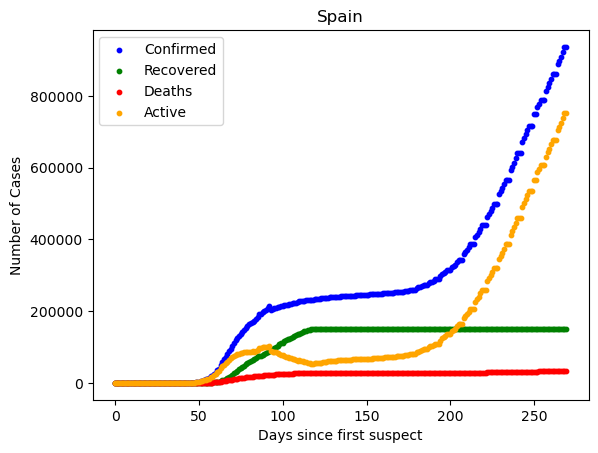

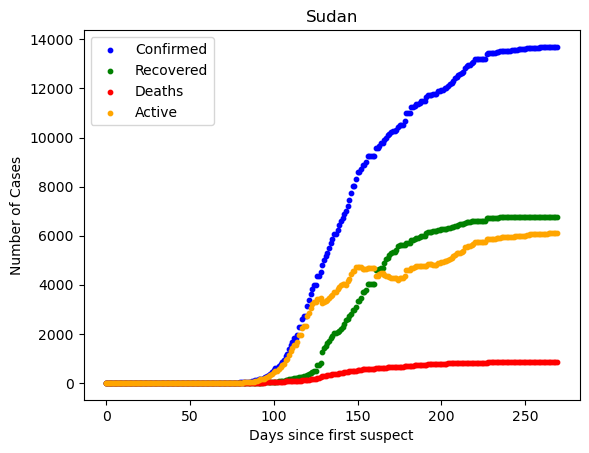

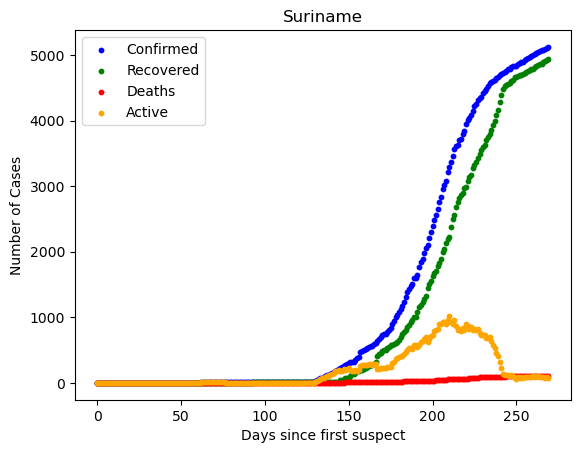

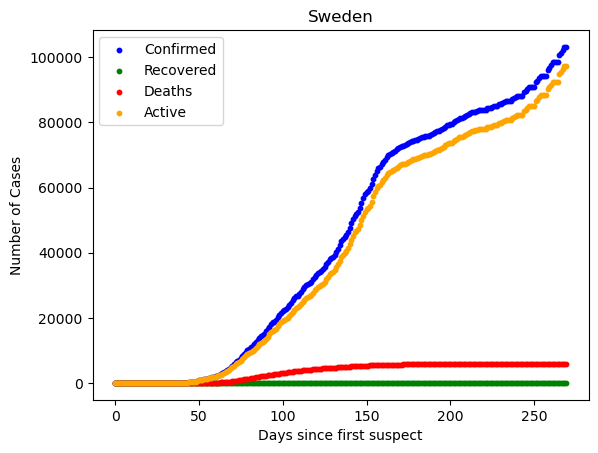

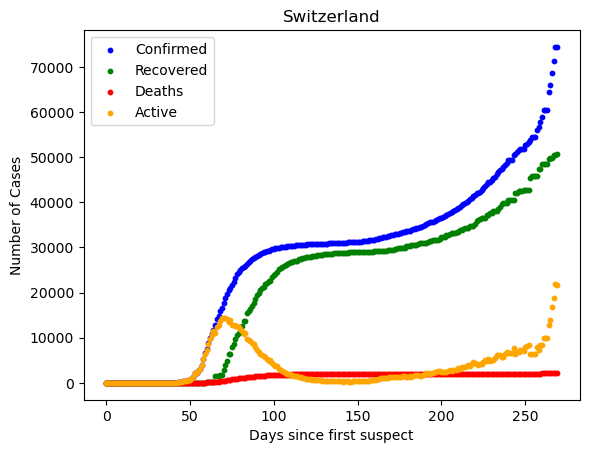

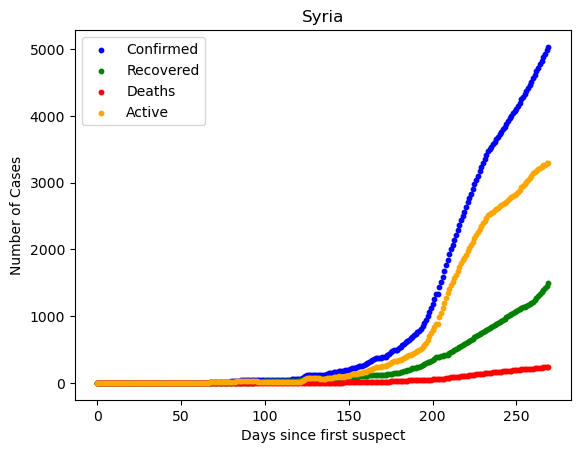

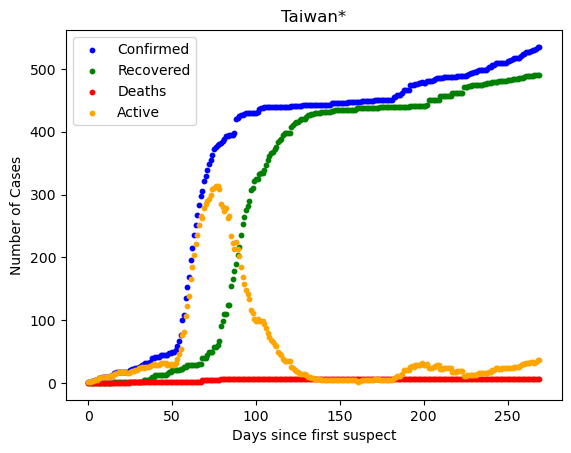

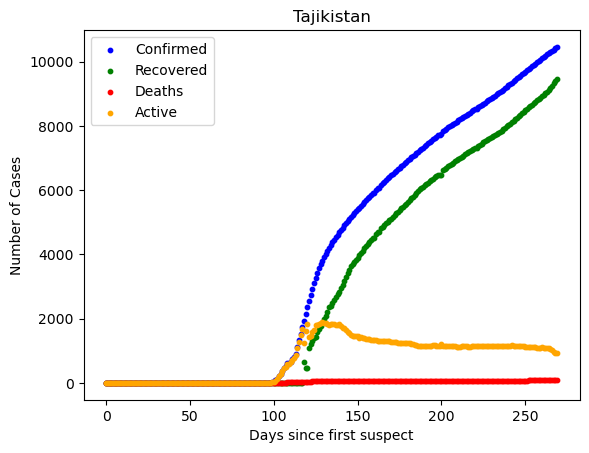

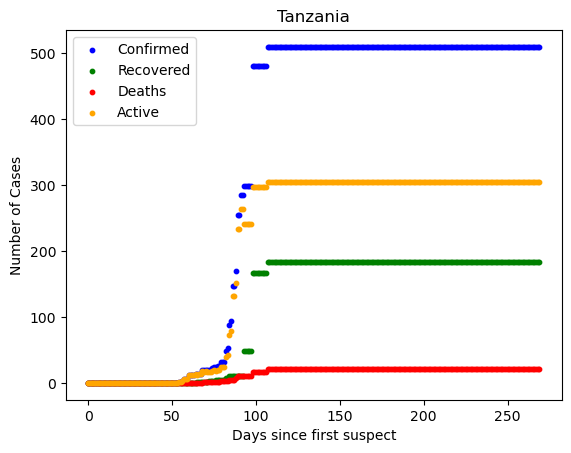

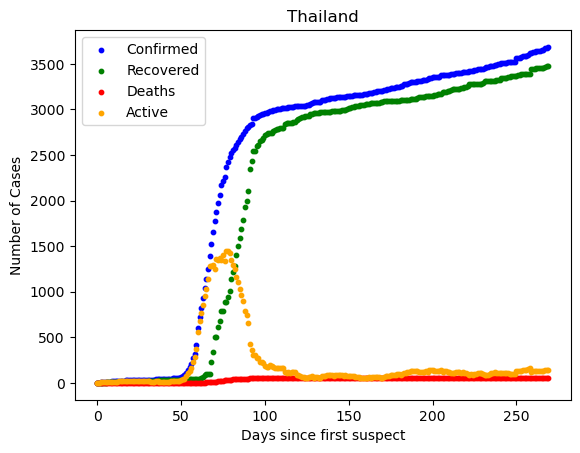

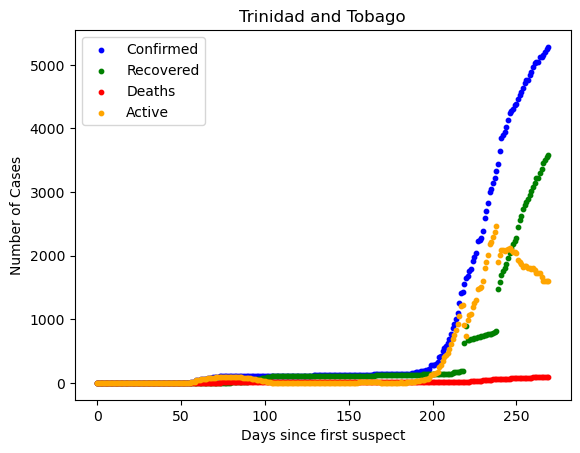

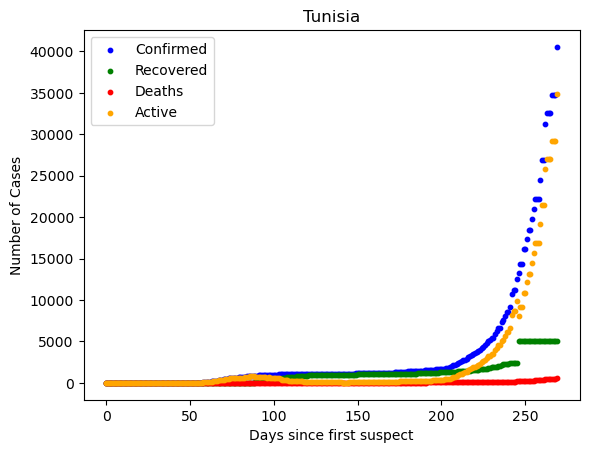

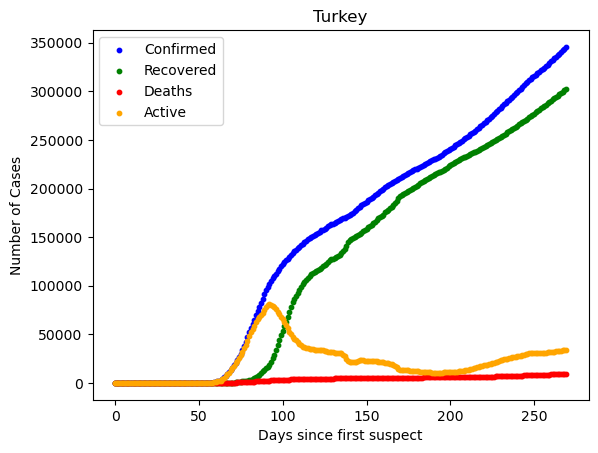

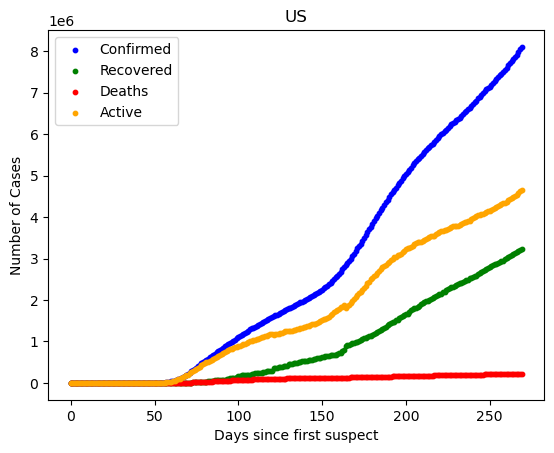

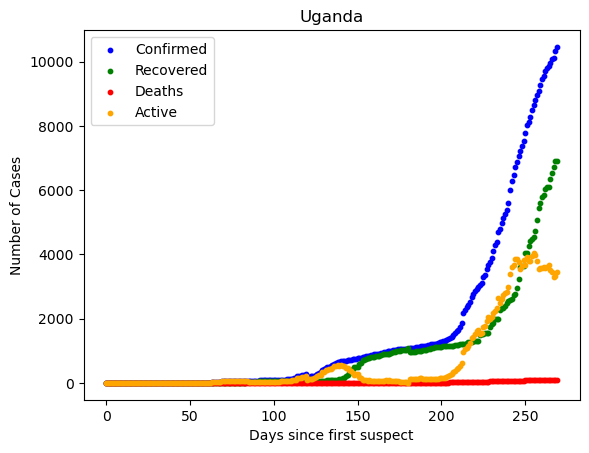

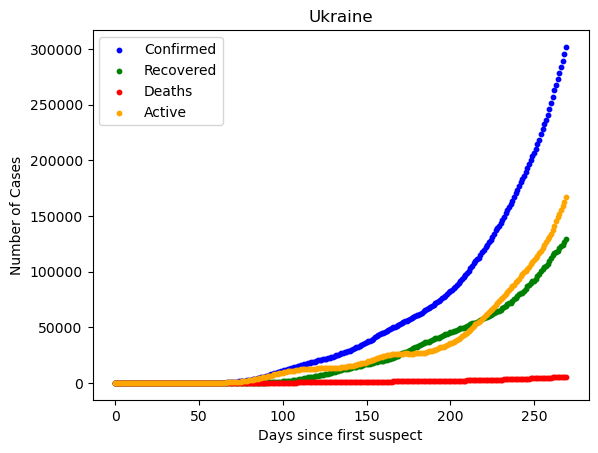

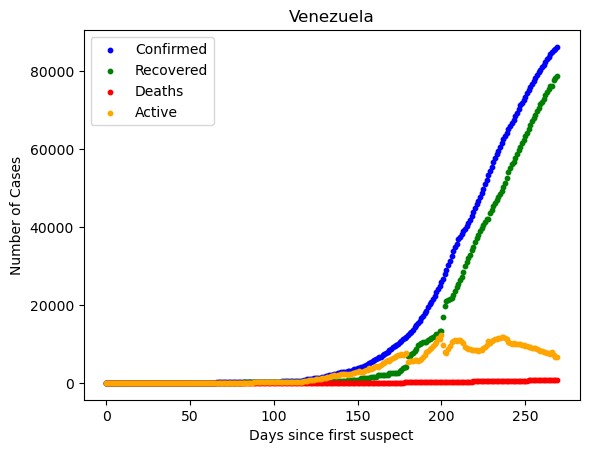

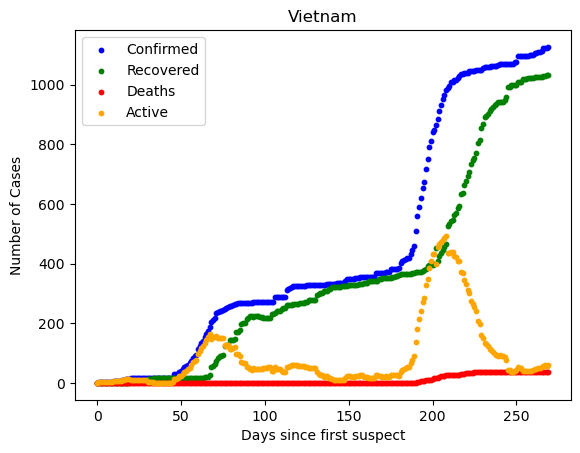

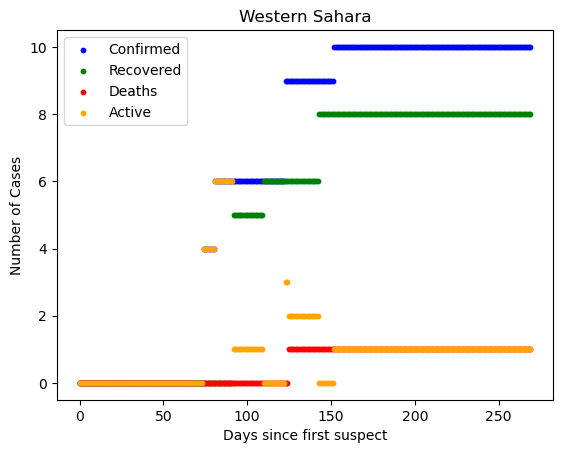

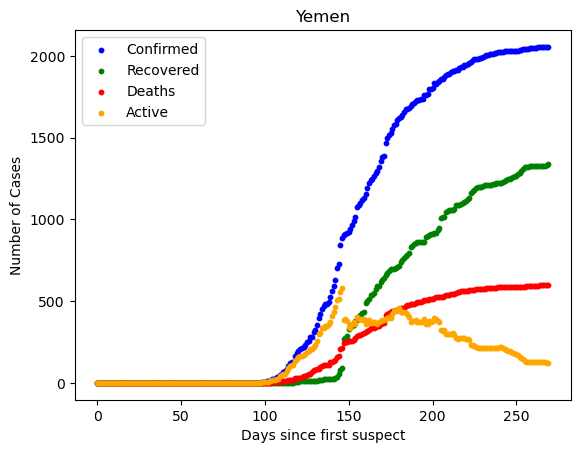

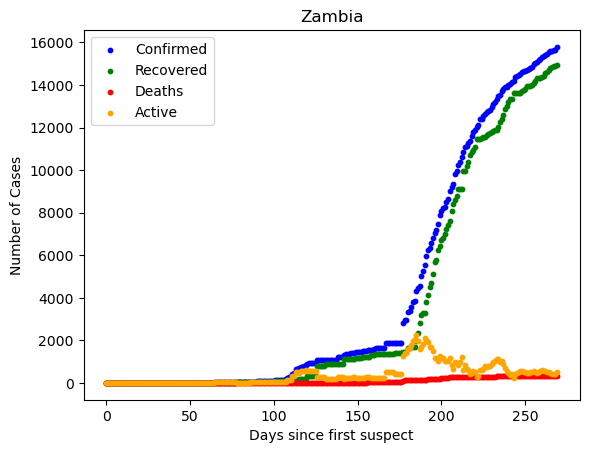

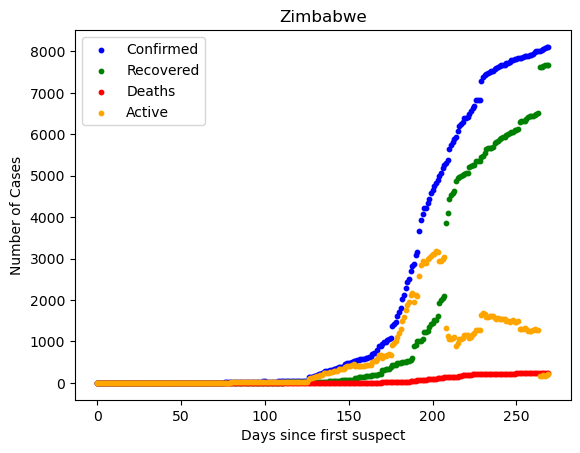

In [41]:
for ind in range(X):
    arr = df3[df3["Country"] == countries[ind]].reset_index()
    
    plt.scatter(np.arange(len(arr)), arr['Confirmed'], color='blue', label='Confirmed', s=10)
    plt.scatter(np.arange(len(arr)), arr['Recovered'], color='green', label='Recovered', s=10)
    plt.scatter(np.arange(len(arr)), arr['Deaths'], color='red', label='Deaths', s=10)
    plt.scatter(np.arange(len(arr)), arr["Active"], color='orange', label='Active', s=10)
    
    plt.title(countries[ind])
    plt.xlabel("Days since first suspect")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()
